In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from gaussxw import gaussxw


# Folha 2

### Ex. 2.6

In [92]:
def LogisticMap(r,x,N):
    R = np.zeros((N))+r
    X = np.zeros((N))+x
    for i in range(N-1):
        X[i+1] = X[i]*r*(1-X[i])
    return R,X

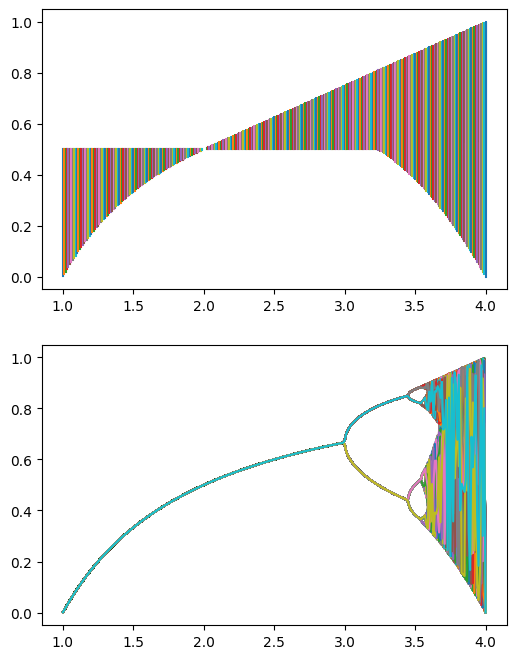

In [93]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
N = 1000
Rf = np.zeros((301,N))
Xf = np.zeros((301,N))
for i in range(100,401):
    R, X = LogisticMap(i/100,0.5,N)
    Rf[i-100,:], Xf[i-100,:] = R, X
    ax1.plot(R,X)
for i in range(500,N):
    ax2.plot(Rf[:,i],Xf[:,i])
plt.show()


### Ex. 2.7

In [94]:
def MandelbrotSet(N=1000,I=100):
    Re= np.linspace(-2,2,N)
    Plane = np.add.outer(Re,Re*1j)
    Z = np.zeros((N,N),dtype = np.clongdouble)
    Colors = np.zeros((N,N),int)
    for i in range(I):
        Z = Z**2+Plane
        Colors += np.array((abs(Z)>2),bool) + np.array((np.isnan(Z)))
    Colors = np.log(Colors+1)
    X, Y = np.meshgrid(Re,Re)

    plt.pcolormesh(X,Y,Colors,vmin = 0, vmax = np.log(I+1),cmap='hot')
    plt.show()

C:\Users\jose2\AppData\Local\Temp\ipykernel_1712\2823565087.py:7: RuntimeWarning: overflow encountered in square
  Z = Z**2+Plane
C:\Users\jose2\AppData\Local\Temp\ipykernel_1712\2823565087.py:7: RuntimeWarning: invalid value encountered in square
  Z = Z**2+Plane
C:\Users\jose2\AppData\Local\Temp\ipykernel_1712\2823565087.py:8: RuntimeWarning: overflow encountered in absolute
  Colors += np.array((abs(Z)>2),bool) + np.array((np.isnan(Z)))


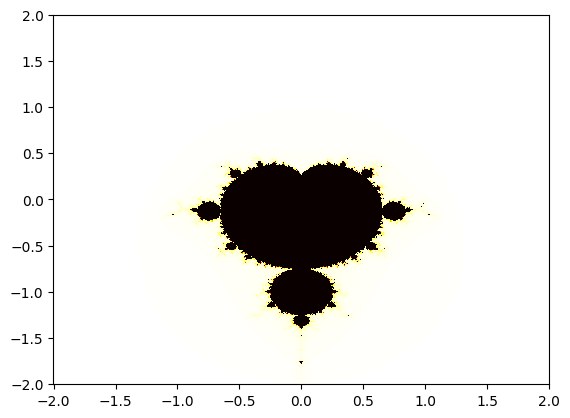

In [95]:
MandelbrotSet()

# Folha 4

### Ex. 4.2

In [96]:
def SimpsonsRule(f,a,b,N):
    t, h = np.linspace(a,b,N, retstep=1)
    t0 = t[:-1]
    tf = t[1:]
    tm = (t0+tf)/2

    return np.sum((h*(f(t0)+4*f(tm)+f(tf)))/6, axis=0)

def TrapezoidalRule(f,a,b,N):
    t, h = np.linspace(a,b,N, retstep=1)
    return np.sum((h*(f(t[:-1])+f(t[:-1])))/2)



def f(x):
    return x**4 - 2*x + 1

In [97]:
(SimpsonsRule(f,0,2,10**4)-4.4)/(TrapezoidalRule(f,0,2,10**4)-4.4)

-7.401404650590621e-13

### Ex. 4.3

In [98]:
def E(x):
    return np.exp(-x**2)

def plterf(min,max,N = 1000):
    fig, ax = plt.subplots()
    t = np.linspace(min,max,N)
    Y = SimpsonsRule(E,0,t,100)
    ax.plot(t,Y)
    ax.grid()
    plt.show()

In [99]:
SimpsonsRule(E,0,3,30)

0.886207347382139

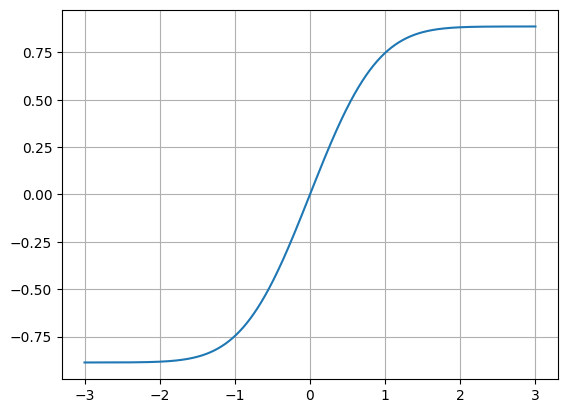

In [100]:
plterf(-3,3)

### Ex. 4.4.1

In [101]:
def J(m,x,N):
    Jintegrand = lambda t: np.cos(m*t-x*np.sin(t))
    return SimpsonsRule(Jintegrand,np.zeros((x.shape)),np.pi,100)/np.pi

def pltJ(m_min = 0,m_max = 2,x_min = 0,x_max = 20,N = 1000):
    fig, ax = plt.subplots()
    X = np.linspace(x_min,x_max,N)
    for i in range(m_min,m_max+1):
        Y = J(i,X,N)
        ax.plot(X,Y,label = "$J_{%i}$" % i)
    ax.legend(fontsize=14)
    plt.show()
        


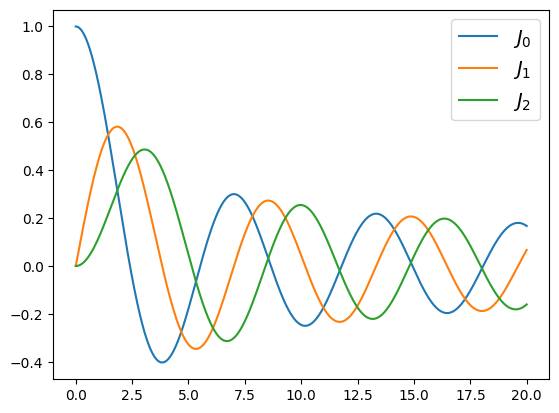

In [102]:
pltJ()

### Ex. 4.4.2

In [103]:
def LightIntensity(l,r,N):
    T = np.linspace(0, 2*np.pi,N)
    R = np.linspace(0, r, N)
    x = np.outer(R, np.cos(T))
    y = np.outer(R, np.sin(T))
    KR = 2*np.pi*np.sqrt(x**2+y**2)/l
    I = (J(1,KR,N)/KR)**2
    I[0,:] = np.zeros(N)+0.5 #lim (J1(x)/x)=1/2
    
    T, R = np.meshgrid(T,R)

    fig = plt.figure() 
    ax = fig.add_subplot(projection = "polar")
    dens = ax.pcolormesh(T,R,I,vmax = 0.01,cmap='gray')
    plt.colorbar(dens)
    ax.grid(False)
    ax.axis(False)
    plt.show()

C:\Users\jose2\AppData\Local\Temp\ipykernel_1712\707339924.py:7: RuntimeWarning: divide by zero encountered in divide
  I = (J(1,KR,N)/KR)**2


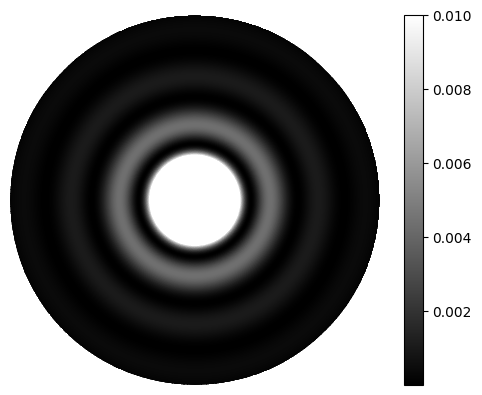

In [105]:
LightIntensity(500e-9,1e-6,1000)

### Ex. 4.6 + 4.7

In [ ]:
def TrapezoidalAdaptative(a,b,emin,f):
    e = np.inf
    h = (b-a)
    I0 = ((f(a)+f(b))*h)/2
    n = 1
    print("n\tI\te")
    print(n,"\t",I0,"\t---")
    while e > emin/10:
        N = 2*n+1
        t,h = np.linspace(a,b,N,retstep=1)
        I = I0 / 2 + np.sum(f(t[1:-1:2]))*h
        e = abs(I-I0)/3
        n *= 2
        print(n,"\t",I,"\t",e)
        I0 = I
    
    return I

def RombergTable(a,b,emin,f):
    e = np.inf
    h = (b-a)
    N = int(np.power(h/emin,1/4))
    R = np.zeros((N,N))
    R[0, 0] = ((f(a)+f(b))*h)/2
    n = 1
    i = 1
    print("1  | ",R[0,0])
    while e > emin/10:
        Points = 2*n+1
        t,h = np.linspace(a,b,Points,retstep=1)
        R[i, 0] = R[i-1, 0] / 2 + np.sum(f(t[1:-1:2]))*h
        print(i+1," | ",R[i,0],"\t",end="")
        for m in range(i):
            R[i, m+1] = R[i, m] + (R[i, m]-R[i-1, m])/(4**(m+1) - 1)
            print(R[i,m+1],"\t",end="")
        print()
        e = abs(R[i, i-1]-R[i-1, i-1])/(4**i-1)
        i += 1
        n *= 2



def SineSq(x):
    return np.sin(np.sqrt(100*x))**2



In [ ]:
TrapezoidalAdaptative(0,1,10**-6,SineSq)

n	I	e
1 	 0.147979484546652 	---
2 	 0.3252319078064746 	 0.05908414108660753
4 	 0.5122828507233315 	 0.06235031430561896
8 	 0.4029974484782483 	 0.03642846741502772
16 	 0.430103369294747 	 0.009035306938832902
32 	 0.44841466578746997 	 0.0061037654975743165
64 	 0.4539129312153759 	 0.0018327551426353117
128 	 0.45534850437280217 	 0.000478524385808754
256 	 0.4557112664532411 	 0.00012092069347964991
512 	 0.45580219965166413 	 3.0311066141005167e-05
1024 	 0.4558249481324202 	 7.58282691868765e-06
2048 	 0.4558306362016461 	 1.8960230753021594e-06
4096 	 0.4558320582782708 	 4.7402554155991555e-07
8192 	 0.4558324138011344 	 1.1850762119773132e-07
16384 	 0.455832502682082 	 2.962698253394791e-08


0.455832502682082

In [ ]:
RombergTable(0,1,10**-6,SineSq)

1  |  0.147979484546652
2  |  0.3252319078064746 	0.38431604889308213 	
3  |  0.5122828507233315 	0.5746331650289505 	0.5873209727713417 	
4  |  0.4029974484782483 	0.3665689810632206 	0.35269803546550527 	0.34897386185747614 	
5  |  0.430103369294747 	0.43913867623357994 	0.4439766559116039 	0.44542552290281184 	0.4458037647108328 	
6  |  0.44841466578746997 	0.45451843128504427 	0.4555437482884752 	0.45572735292937794 	0.45576775226281546 	0.455777492231097 	
7  |  0.4539129312153759 	0.4557456863580112 	0.4558275033628757 	0.4558320074116757 	0.45583241782141015 	0.45583248103309987 	0.45583249446137875 	


In [ ]:
%timeit -n 10 -r 20 TrapezoidalAdaptative(0,1,10**-6,SineSq)

n	I	e
1 	 0.147979484546652 	---
2 	 0.3252319078064746 	 0.05908414108660753
4 	 0.5122828507233315 	 0.06235031430561896
8 	 0.4029974484782483 	 0.03642846741502772
16 	 0.430103369294747 	 0.009035306938832902
32 	 0.44841466578746997 	 0.0061037654975743165
64 	 0.4539129312153759 	 0.0018327551426353117
128 	 0.45534850437280217 	 0.000478524385808754
256 	 0.4557112664532411 	 0.00012092069347964991
512 	 0.45580219965166413 	 3.0311066141005167e-05
1024 	 0.4558249481324202 	 7.58282691868765e-06
2048 	 0.4558306362016461 	 1.8960230753021594e-06
4096 	 0.4558320582782708 	 4.7402554155991555e-07
8192 	 0.4558324138011344 	 1.1850762119773132e-07
16384 	 0.455832502682082 	 2.962698253394791e-08
n	I	e
1 	 0.147979484546652 	---
2 	 0.3252319078064746 	 0.05908414108660753
4 	 0.5122828507233315 	 0.06235031430561896
8 	 0.4029974484782483 	 0.03642846741502772
16 	 0.430103369294747 	 0.009035306938832902
32 	 0.44841466578746997 	 0.0061037654975743165
64 	 0.4539129312153759 

In [ ]:
%timeit -n 10 -r 20 RombergTable(0,1,10**-6,SineSq)

1  |  0.147979484546652
2  |  0.3252319078064746 	0.38431604889308213 	
3  |  0.5122828507233315 	0.5746331650289505 	0.5873209727713417 	
4  |  0.4029974484782483 	0.3665689810632206 	0.35269803546550527 	0.34897386185747614 	
5  |  0.430103369294747 	0.43913867623357994 	0.4439766559116039 	0.44542552290281184 	0.4458037647108328 	
6  |  0.44841466578746997 	0.45451843128504427 	0.4555437482884752 	0.45572735292937794 	0.45576775226281546 	0.455777492231097 	
7  |  0.4539129312153759 	0.4557456863580112 	0.4558275033628757 	0.4558320074116757 	0.45583241782141015 	0.45583248103309987 	0.45583249446137875 	
1  |  0.147979484546652
2  |  0.3252319078064746 	0.38431604889308213 	
3  |  0.5122828507233315 	0.5746331650289505 	0.5873209727713417 	
4  |  0.4029974484782483 	0.3665689810632206 	0.35269803546550527 	0.34897386185747614 	
5  |  0.430103369294747 	0.43913867623357994 	0.4439766559116039 	0.44542552290281184 	0.4458037647108328 	
6  |  0.44841466578746997 	0.45451843128504427 	

### Ex. 4.8

In [ ]:
def SimpsonAdaptative(a,b,emin,f):
    e = np.inf
    S0 = (f(a)+f(b))/3
    T0 = 2*f((a+b)/2)/3
    I0 = (a-b)*(S0+2*T0)/2
    n = 2
    print("n\tI\te")
    print(n,"\t",I0,"\t---")
    while e > emin:
        N = 2*n+1

        S = S0+T0
        S0 = S
        
        t, h = np.linspace(a,b,N,retstep=1)
        T = 2*np.sum(f(t[1:-1:2]))/3
        T0 = T

        I = h*(S+2*T)
        e = abs(I-I0)/15

        I0 = I
        n *= 2
        print(n,"\t",I,"\t",e)
    return I

    

In [ ]:
SimpsonAdaptative(0,1,10**-6,SineSq)

n	I	e
2 	 -0.38431604889308213 	---
4 	 0.5746331650289503 	 0.06392994759480217
8 	 0.36656898106322056 	 0.013870945597715319
16 	 0.4391386762335798 	 0.004837979678023951
32 	 0.45451843128504427 	 0.0010253170034309625
64 	 0.45574568635801116 	 8.181700486445954e-05
128 	 0.4558270287586109 	 5.422826706650655e-06
256 	 0.4558321871467207 	 3.4389254065144335e-07


0.4558321871467207

### Ex. 4.9

In [ ]:
def GaussianQuadrature(a,b,N,f):
    x, w = gaussxw(N)
    X = np.outer((b-a),x)/2 + np.outer((b+a),np.ones(x.shape))/2
    W = np.outer((b-a),w)/2
    I = np.squeeze(np.inner(f(X),W))
    
    if I.ndim != 1 and I.ndim!=0:
        return np.diag(I)
    else:
        return I
    
def cv(T,p=6.022e28,V=1000e-6,N=50):
    T = np.array(T)
    kB = 1.38e-23
    TD = 428
    Integrand = lambda x : x**4*np.exp(x)/(np.exp(x)-1)**2
    return 9*V*p*kB*(T/TD)**3*GaussianQuadrature(0,TD/T,N,Integrand)


def plotfunc(a,b,N,f):
    X = np.linspace(a,b,N)
    Y = f(X)
    plt.plot(X,Y)

In [ ]:
cv(500)

2404.105832265451

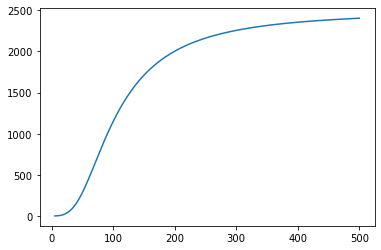

In [ ]:
plotfunc(5,500,1000,cv)

## Teste de velocidade para o ciclo for vs GaussianQuadrature alterada

In [ ]:
def GaussQuadNorm(a,b,N,f):
    x, w = gaussxw(N)
    X = (b-a)*x/2 + (b+a)/2
    W = (b-a)*w/2
    return np.inner(f(X),W)

def cvplot(T0,T,P,p=6.022e28,V=1000e-6,N=50):
    kB = 1.38e-23
    TD = 428
    Integrand = lambda x : x**4*np.exp(x)/(np.exp(x)-1)**2
    X = np.linspace(T0,T,P)
    Y = np.zeros((P))
    for i in range(P):
        Y[i] = 9*V*p*kB*(X[i]/TD)**3*GaussQuadNorm(0,TD/X[i],N,Integrand)
    plt.plot(X,Y)

7.03 ms ± 1.71 ms per loop (mean ± std. dev. of 20 runs, 10 loops each)


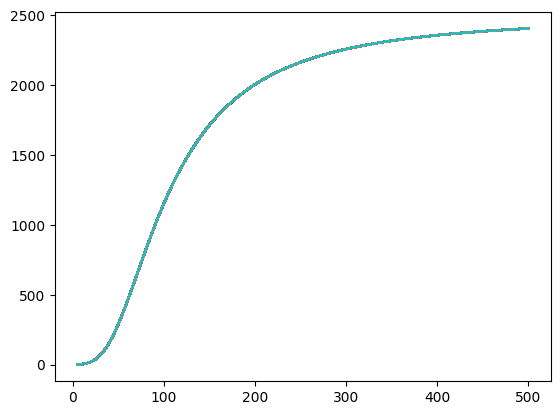

In [ ]:
%timeit -n 10 -r 20 plotfunc(5,500,1000,cv)

1.75 s ± 60.7 ms per loop (mean ± std. dev. of 20 runs, 10 loops each)


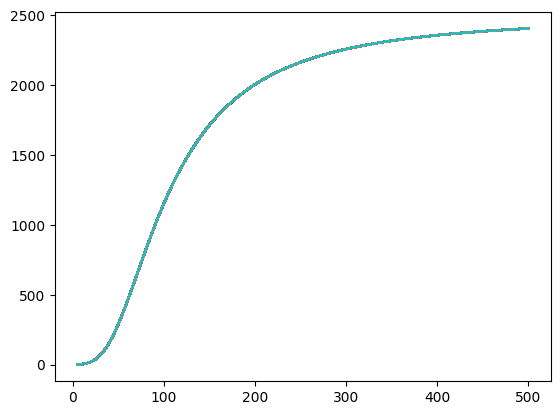

In [ ]:
%timeit -n 10 -r 20 cvplot(5,500,1000)

# Folha 4 (cont.)

### Ex. 4.10

$$\begin{align}
E = \frac{1}{2} m \left(\frac{\mathrm d x}{\mathrm d t}\right)^{2} + V(x)\\
\sqrt{\left(V(a)-V(x)\right)\frac{2}{m}} = \frac{\mathrm d x}{\mathrm d t}\\
\mathrm d t =\sqrt{\frac{m}{2 \left(V(a)-V(x)\right)}} \mathrm d x\\
\int_0^\frac{T}{4}\,\mathrm d t = \int_0^a \sqrt{\frac{m}{2 \left(V(a)-V(x)\right)}}\, \mathrm d x\\
\frac{T}{4} = \sqrt{\frac{m}{2}} \int_0^a \frac{\mathrm d x}{\sqrt{V(a)-V(x)}}\\
T =  \sqrt{8 m} \int_0^a \frac{\mathrm d x}{\sqrt{V(a)-V(x)}}
\end{align}$$

In [ ]:
V = lambda x: x**4
def OscilatorPeriod(m,a,N,V):
    a = np.array(a)
    m = np.ones(a.shape)*m
    Va = np.resize(V(a),(N,a.size)).T
    return np.sqrt(8*m)*GaussianQuadrature(np.zeros(a.shape),a,N,lambda x: 1/np.sqrt(Va-V(x)))



In [ ]:
OscilatorPeriod(1,2,20,V)

array([1.82404704])

C:\Users\jose2\AppData\Local\Temp\ipykernel_20404\1913091363.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(8*m)*GaussianQuadrature(np.zeros(a.shape),a,N,lambda x: 1/np.sqrt(Va-V(x)))
C:\Users\jose2\AppData\Local\Temp\ipykernel_20404\2719394950.py:6: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(f(X),W.T)[lines,lines]


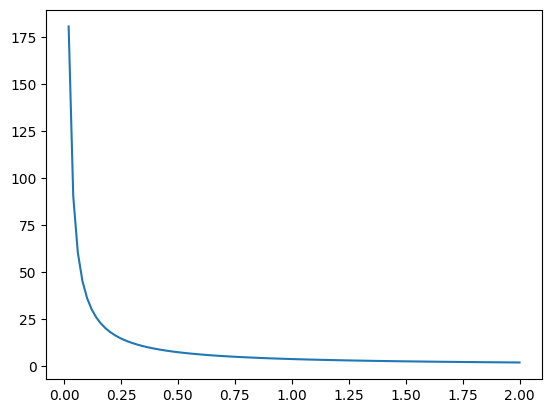

In [ ]:
plotfunc(0,2,100,lambda a: OscilatorPeriod(1,a,20,V))

### Ex. 4.11

In [ ]:
def BlockedWave(x,z,l,N=50):
    u = x*np.sqrt(2/(l*z))
    Cint = lambda t: np.cos(np.pi*t**2/2)
    Sint = lambda t: np.sin(np.pi*t**2/2)
    C = GaussianQuadrature(0,u,N,Cint)
    S = GaussianQuadrature(0,u,N,Sint)
    I = ((2*C+1)**2+(2*S+1)**2)/8
    return I

In [ ]:
BlockedWave(3,3,1,50)

array([1.143916])

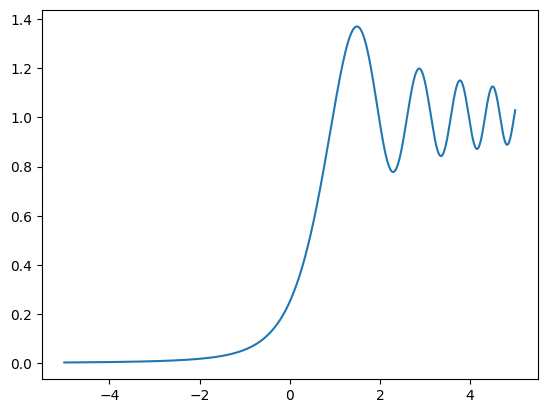

In [ ]:
plotfunc(-5,5,1000,lambda x: BlockedWave(x,3,1))

### Ex. 4.12

In [ ]:
def Derivative(a,h,f):
    return (f(a+h)-f(a-h))/(2*h)


In [ ]:
print(Derivative(0,10**-5,lambda x: 1+np.tanh(2*x)/2))

0.9999999998677732


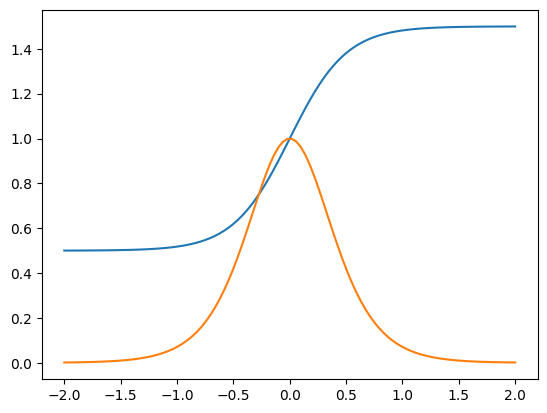

In [ ]:
plotfunc(-2,2,100,lambda x: 1+np.tanh(2*x)/2)
plotfunc(-2,2,100,lambda x: Derivative(x,0.0001,lambda y: 1+np.tanh(2*y)/2))

# Folha 5

### Ex. 5.1.1

$$
\begin{align}
\frac{V_2-V_1}{R}+\frac{V_2-V_4}{R}+\frac{V_2}{R} = 0\\
\frac{V_3-V_1}{R}+\frac{V_3-V_4}{R}+\frac{V_3-V_+}{R}=0\\
\frac{V_4-V_1}{R}+\frac{V_4-V_2}{R}+\frac{V_4-V_3}{R}+\frac{V_4}{R}=0
\end{align}
$$
$$
\begin{align}
3 V_2 - V_1 - V_4 = 0\\
3 V_3 - V_1 - V_4 = V_+\\
4 V_4 - V_1 - V_2 - V_3 = 0
\end{align}
$$

### Ex. 5.1.2 - 5.3

In [ ]:
def ObterMatriz(Eq = "",X = ""):
    Eq = Eq.split(",") # Separa as equações
    X = np.array(X.split(","),str) # Separa as variáveis
    N = len(X) 
    T = np.zeros(N,int)
    for i in range(N):
        T[i] = len(X[i]) # Atribui o tamanho de cada variável a um vetor
    A = np.zeros((N,N),complex)
    B = np.zeros(N,complex)
    for i in range(N):
        Eq[i],a,B[i] = Eq[i].partition("=") # Divide os lados da equação
        Eq[i] = Eq[i].replace("(","")
        Eq[i] = Eq[i].replace(")","")
        if Eq[i][0] != "+" and Eq[i][0] != "-": 
            Eq[i]  = "+" + Eq[i] # Adiciona um + para o caso do primeiro número ser 1
        
        for j in range(N):

            k = Eq[i].find(X[j]) # Procura a j-ésima variável
            if k != -1: # Para o caso da variável estar na i-ésima equação

                if Eq[i][:k] == "+" or Eq[i][:k] == "-":
                    Eq[i] = Eq[i][:k] + "1" + Eq[i][k:] # Adiciona um 1 entre o sinal e a variável
                    k += 1 # Reposiciona o índice da variável
                A[i,j] = Eq[i][:k] # Atribui o coeficiente para uma matriz
                k = k + T[j] - 1 # Reposiciona o índice da variável para o fim desta

            Eq[i] = Eq[i][k+1:] # Remove a primeira variável e coeficiente da equação
    return A,X,B

def GaussElim(args,met="partial"):
    Mat,var,vec = args[:3] # Atribuiu os valores de cada variável
    if met == "total":
        n = vec.size
        M = np.zeros((n,n+1),dtype=complex)
        M[:,:n] = Mat
        M[:,-1] = vec
        for i in range(n):
            Max = np.argmax(abs(M[:,i]))
            M[[i,Max],:] = M[[Max,i],:]
            M[i,:] /= M[i,i]

            M[i+1:,:] -= np.outer(M[i+1:,i],M[i,:])
            M[:i,:] -= np.outer(M[:i,i],M[i,:])
        return M[:,-1]
    """Pivotagem total para vários vec
    T = vec.shape
    n = T[0]
    M = np.zeros((n,n+T[1]))
    M[:,:n] = Mat
    M[:,n:] = vec
    if method == "TGJ":
        for i in range(n):
            Max = np.argmax(abs(M[:,i]))
            M[[i,Max],:] = M[[Max,i],:]
            M[i,:] /= M[i,i]

            M[i+1:,:] -= np.outer(M[i+1:,i],M[i,:])
            M[:i,:] -= np.outer(M[:i,i],M[i,:])
        return M[:,n:]"""
    N = var.size 
    X = np.zeros(N,Mat.dtype)
    if met == "partial":
        for i in range(N-1): 
            if Mat[i,i] == 0:
                Max = np.argmax(abs(Mat[:,i]))
                Mat[[i,Max],:] = Mat[[Max,i],:]
                vec[[i,Max]] = vec[[Max,i]]

            mul = Mat[i+1:,i]
            # Para cada vetor linha v_j da matriz do sistema realiza a operação v_j = v_j - a_ji*v_i/a_ii, com j > i e a_ij o elemento da linha i e coluna j, ou seja, torna a matriz triangular
            Mat[i+1:,:],vec[i+1:] = Mat[i+1:,:] - np.outer(mul,Mat[i,:])/Mat[i,i], vec[i+1:] - mul*vec[i]/Mat[i,i]
            
            
        for i in range(N-1,-1,-1):
            # Determina o valor para cada variável (começando pelo fim)
            X[i] = (vec[i]-np.sum(X[i+1:]*Mat[i,i+1:]))/Mat[i,i]
            
    if met == "LU":
        P,L,U = LUdecomposition((Mat,var,vec))
        X = np.matmul(P,vec.T)
        for i in range(N-1,-1,-1):
            X[i] = (vec[i]-np.sum(X[i+1:]*L[i,i+1:]))/L[i,i]
            X[i] = (vec[i]-np.sum(X[i+1:]*U[i,i+1:]))/U[i,i]
    #print(var,"=",X)
    return X


In [ ]:
GaussElim(ObterMatriz("4V_1-V_2-V_3-V_4=5,-V_1+3V_2-V_4=0,-V_1+3V_3-V_4=5,-V_1-V_2-V_3+4V_4=0","V_1,V_2,V_3,V_4"),"LU")

array([3.        +0.j, 1.66666667+0.j, 3.33333333+0.j, 2.        +0.j])

In [ ]:
def gausselim2(A,v):
    N = len(v)
    for m in range(N):
        
        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]

    # Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]

    return(x)


In [ ]:
GaussElim(ObterMatriz("x+4y+z=-4,3w+4x-y-z=3,w-4x+y+5z=9,2w-2x+y+3z=7","w,x,y,z"))

array([ 1.61904762+0.j, -0.42857143+0.j, -1.23809524+0.j,  1.38095238-0.j])

In [ ]:
GaussElim(ObterMatriz("4x-y-z-w=5,-x+3y-w=0,-x+3z-w=5,-x-y-z+4w=0","x,y,z,w"))

array([3.        +0.j, 1.66666667+0.j, 3.33333333+0.j, 2.        +0.j])

In [ ]:
def LUdecomposition(Mat):
    
    N = Mat.shape[0]
    U = np.copy(Mat)
    L = np.identity(N,Mat.dtype)
    P = np.identity(N,Mat.dtype)

    for i in range(N-1): 
        Max = np.argmax(abs(U[:,i]))
        U[[i,Max],:] = U[[Max,i],:]
        P[[i,Max],:] = P[[Max,i],:]
        mul = U[i+1:,i]/U[i,i]
        U[i+1:,:] -= np.outer(mul,U[i,:])
        L[i+1:,i] = mul
    return P,L,U
    

In [ ]:
LUdecomposition(ObterMatriz("y+7.333333333333333z=0,4x+2y+z=0,2x+7y+9z=0","x,y,z")[0])

(array([[0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j, 0.+0.j]]),
 array([[1.        +0.j, 0.        +0.j, 0.        +0.j],
        [0.        +0.j, 1.        +0.j, 0.        +0.j],
        [0.5       +0.j, 0.16666667+0.j, 1.        +0.j]]),
 array([[4.        +0.j, 2.        +0.j, 1.        +0.j],
        [0.        +0.j, 6.        +0.j, 8.5       +0.j],
        [0.        +0.j, 0.        +0.j, 5.91666667+0.j]]))

In [ ]:
def LUdecomposition2(args):
    Mat,var,vec = args[:3]

    N = var.size
    lines = np.arange(N)
    U = np.copy(Mat)
    L = np.identity(N)
    P = np.identity(N)

    for i in range(N-1): 
        if U[lines[i],i] == 0:
            Max = np.argmax(abs(U[:,i]))
            lines[[i,Max]] = lines[[Max,i]]
        L[i+1:,i] = U[lines[i+1:],i]/U[lines[i],i]
        U[lines[i+1:],:],vec[lines[i+1:]] = U[lines[i+1:],:] - np.outer(L[i+1:,i],U[lines[i],:]), vec[lines[i+1:]] - L[i+1,i]*vec[lines[i]]
    #print(U,"\n",L)
    #print(np.matmul(P[lines].T,np.matmul(L,U[lines]))==Mat)
    return P[lines],L,U[lines]
    

In [ ]:
LUdecomposition2(ObterMatriz("y+7.333333333333333z=0,4x+2y+z=0,2x+7y+9z=0","x,y,z"))


C:\Users\jose2\AppData\Local\Temp\ipykernel_6064\3915377376.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  L[i+1:,i] = U[lines[i+1:],i]/U[lines[i],i]


(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.]]),
 array([[1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0.5, 6. , 1. ]]),
 array([[  4.        +0.j,   2.        +0.j,   1.        +0.j],
        [  0.        +0.j,   1.        +0.j,   7.33333333+0.j],
        [  0.        +0.j,   0.        +0.j, -35.5       +0.j]]))

In [ ]:
args = ObterMatriz("y+7.333333333333333z=2,4x+2y+z=0,2x+7y+9z=0","x,y,z")


In [ ]:
%timeit LUdecomposition(args[0])

41.3 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit LUdecomposition2(args)

C:\Users\jose2\AppData\Local\Temp\ipykernel_21776\319220703.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  L[i:,i] = A[i:,i] - np.dot(L[i:,:i], U[:i,i])
C:\Users\jose2\AppData\Local\Temp\ipykernel_21776\319220703.py:14: RuntimeWarning: divide by zero encountered in divide
  U[i, i+1:] = (A[i, i+1:] - np.dot(L[i,:i], U[:i, i+1:]) )/L[i,i]
C:\Users\jose2\AppData\Local\Temp\ipykernel_21776\319220703.py:14: RuntimeWarning: invalid value encountered in divide
  U[i, i+1:] = (A[i, i+1:] - np.dot(L[i,:i], U[:i, i+1:]) )/L[i,i]
C:\Users\jose2\AppData\Local\Temp\ipykernel_21776\319220703.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  U[i, i+1:] = (A[i, i+1:] - np.dot(L[i,:i], U[:i, i+1:]) )/L[i,i]


71.3 µs ± 2.23 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
np.linalg.solve(args[0],args[-1])

array([  50743.10093897+0.j, -108910.94835681+0.j,   14851.49295775+0.j])

In [ ]:
GaussElim(args,"LU")

array([  50743.10093897+0.j, -108910.94835681+0.j,   14851.49295775-0.j])

In [ ]:
args = ObterMatriz("4V_1-V_2-V_3-V_4=5,-V_1+3V_2-V_4=0,-V_1+3V_3-V_4=5,-V_1-V_2-V_3+4V_4=0","V_1,V_2,V_3,V_4")
np.linalg.solve(args[0],args[2])

array([3.        +0.j, 1.66666667+0.j, 3.33333333+0.j, 2.        +0.j])

### Ex. 5.5.1
Pela lei dos nodos de Kirchhoff,

\begin{equation*}
\left\{
\begin{alignedat}{3}
    \frac{V_1-V_+}{R_1} & = -\frac{V_1}{R_4} &  +{} & C_1\frac{d}{d t}(V_2-V_1) \\
    \frac{V_2-V_+}{R_2} & = -\frac{V_2}{R_5} &  +{} & C_1\frac{d}{d t}(V_1-V_2) &  +{} & C_2\frac{d}{d t}(V_3-V_2) \\
    \frac{V_3-V_+}{R_3} & = -\frac{V_3}{R_6} &  +{} & C_2\frac{d}{d t}(V_2-V_3)
\end{alignedat}
\right.
\end{equation*}


\begin{equation*}
\left\{
\begin{alignedat}{3}
    \frac{x_1-x_+}{R_1} e^{i \omega t} & = -\frac{x_1}{R_4} e^{i \omega t} & +{} & C_1\frac{d}{d t}[(x_2-x_1) e^{i \omega t}]\\
    \frac{x_2-x_+}{R_2} e^{i \omega t} & = -\frac{x_2}{R_5} e^{i \omega t} & +{} & C_1\frac{d}{d t}[(x_1-x_2) e^{i \omega t}] & +{} & C_2\frac{d}{d t}[(x_3-x_2) e^{i \omega t}] \\
    \frac{x_3-x_+}{R_1} e^{i \omega t} & = -\frac{x_3}{R_6} e^{i \omega t} & +{} & C_2\frac{d}{d t}[(x_2-x_3) e^{i \omega t}]
\end{alignedat}
\right.
\end{equation*}

\begin{equation*}
\left\{
\begin{alignedat}{4}
    \frac{x_1}{R_1} & +{} & \frac{x_1}{R_4} & +{} & C_1 (x_1-x_2) i \omega & = \frac{x_+}{R_1}\\
    \frac{x_2}{R_2} & +{} & \frac{x_2}{R_5} & +{} & C_1 (x_2-x_1) i \omega & + C_2 (x_2-x_3) i \omega &= \frac{x_+}{R_2}\\
    \frac{x_3}{R_3} & +{} & \frac{x_3}{R_6} & +{} & C_2 (x_3-x_2) i \omega & = \frac{x_+}{R_3}
\end{alignedat}
\right.
\end{equation*}

\begin{equation*}
\left\{
\begin{alignedat}{3}
    \left(\frac{1}{R_1}  + \frac{1}{R_4} + i \omega C_1\right) x_1 - i \omega C_1 x_2 & = \frac{x_+}{R_1}\\
    -i \omega C_1 x_1  +  \left(\frac{1}{R_2} + \frac{1}{R_5} + i \omega C_1 + i \omega C_2\right) - i \omega C_2 x_3 &= \frac{x_+}{R_2}\\
    \left(\frac{1}{R_3}  + \frac{1}{R_6} + i \omega C_2\right) x_3 - i \omega C_2 x_2 & = \frac{x_+}{R_3}\\
\end{alignedat}
\right.
\end{equation*}


### Ex. 5.5.2
Substituindo os valores nas equações obtemos que: 
\begin{equation*}
\left\{
\begin{alignedat}{3}
    \left(1.5 + 1000 i\right) x_1 - 1000i x_2 & = 3\\
    -1000 i x_1  +  \left(1.5 + 1500 i\right) - 500 i x_3 &= 1.5\\
    -500 i x_2\left(1.5 + 500 i \right) x_3& = 3\\
\end{alignedat}
\right.
\end{equation*}

In [ ]:
X = GaussElim(ObterMatriz("(1.5+1e3j)x1-1e3jx2=3,-1e3jx1+(1.5+1.5e3j)x2-0.5e3jx3=1.5,-0.5e3jx2+(1.5+0.5e3j)x3=3","x1,x2,x3"))
V = abs(X)
Arg = np.angle(X)
print("V= ",V)
print("Fase = ",Arg)
print("X = ",X)
print("V*e^(iArg)= ",V*np.exp(Arg * 1j))

V=  [1.66666617 1.66666624 1.66666774]
Fase =  [-8.99989017e-10  2.99999631e-04 -2.99998461e-04]
X =  [1.66666617-1.49998124e-09j 1.66666617+4.99999250e-04j
 1.66666767-4.99997750e-04j]
V*e^(iArg)=  [1.66666617-1.49998124e-09j 1.66666617+4.99999250e-04j
 1.66666767-4.99997750e-04j]


### Ex. 5.6

In [401]:
def Springs():
    # Constants
    N = 26
    C = 1.0
    m = 1.0
    k = 6.0
    omega = 2.0
    alpha = 2*k-m*omega*omega

    # Set up the initial values of the arrays
    A = np.zeros([N,N],float)
    for i in range(N-1):
        A[i,i] = alpha
        A[i,i+1] = -k
        A[i+1,i] = -k
    A[0,0] = alpha - k
    A[N-1,N-1] = alpha - k

    v = np.zeros(N,float)
    v[0] = C

    # Perform the Gaussian elimination
    for i in range(N-1):

        # Divide row i by its diagonal element
        A[i,i+1] /= A[i,i]
        v[i] /= A[i,i]

        # Now subtract it from the next row down
        A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
        v[i+1] -= A[i+1,i]*v[i]

    # Divide the last element of v by the last diagonal element
    v[N-1] /= A[N-1,N-1]

    # Backsubstitution
    x = np.empty(N,float)
    x[N-1] = v[N-1]
    for i in range(N-2,-1,-1):
        x[i] = v[i] - A[i,i+1]*x[i+1]
    
    fig, ax = plt.subplots()
    ax.set_ylim(-np.max(x),np.max(x))
    line = ax.plot(np.arange(N),np.zeros(N),"o-",lw=2)
    p = 100

    def func(frame):
        line[0].set_ydata(x*np.cos(2*np.pi*frame/p))
        return line
    ani = animation.FuncAnimation(fig,func,p,interval=30)
    ani.save(".\\grafico.gif")
    plt.show()

    

MovieWriter ffmpeg unavailable; using Pillow instead.


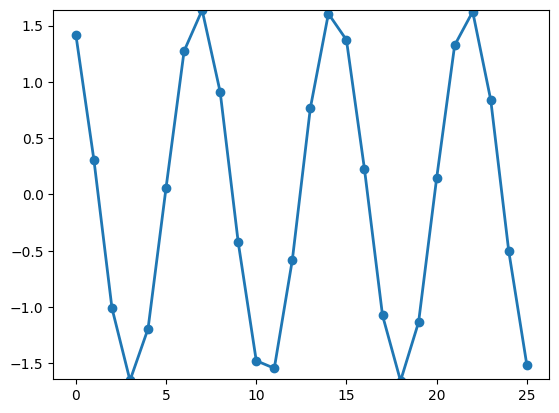

In [402]:
Springs()

### Ex. 5.7.1

Pela lei dos nodos

\begin{equation*}
\begin{alignedat}{1}
    \frac{V_1-V_+}{R}+\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R} & =0\\
    \frac{V_2-V_+}{R}\frac{V_2-V_1}{R}\frac{V_2-V_3}{R}\frac{V_2-V_4}{R} & =0\\
    \cdots\\
    \frac{V_{i}-V_{i-2}}{R}+\frac{V_{i}-V_{i-1}}{R}+\frac{V_{i}-V_{i+1}}{R}+\frac{V_{i}-V_{i+2}}{R} & =0\\
    \cdots\\
    \frac{V_{N-1}-V_{N-3}}{R}+\frac{V_{N-1}-V_{N-2}}{R}+\frac{V_{N-1}-V_{N}}{R}+\frac{V_{N-1}-0}{R} & =0\\
    \frac{V_{N}-V_{N-2}}{R}+\frac{V_{N}-V_{N-1}}{R}+\frac{V_{N}-0}{R} & =0
\end{alignedat}
\end{equation*}

\begin{equation*}
\begin{alignedat}{}
    3 V_1 - V_2 - V_3 & = V_+\\
    - V_1 + 4 V_2 - V_3 - V_4 & = V_+\\
    \cdots\\
    - V_{i-2} - V_{i-1} + 4 V_i - V_{i+1} - V_{i+2} & = 0\\
    \cdots\\
    - V_{N-3} - V_{N-2} + 4 V_{N-1} - V_{N} & = 0\\
    - V_{N-2} - V_{N-1} + 3 V_{N} & = 0
\end{alignedat}
\end{equation*}



### Ex. 5.7.2
$$
\begin{bmatrix}
3 & -1 & -1 & 0 & 0 & \ldots & 0 & 0 & 0 & 0 & 0 &0 & 0 &  \ldots & 0 & 0 & 0 & 0 & 0\\
-1 & 4 & -1 & -1 & 0 & \ldots & 0 & 0 & 0 & 0 & 0 & 0& 0&\ldots  & 0 & 0 & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots &  &\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & \ldots & 0 & -1 & -1 & 4 & -1 & -1 & 0 &\ldots  & 0 & 0 & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots &  &\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0 & 0 & 0 & 0 &0 & 0 &  \ldots & 0 & -1 & -1 & 4 & -1\\
0 & 0 & 0 & 0 & 0 & \ldots & 0 & 0 & 0 & 0 & 0 &0 & 0 &  \ldots & 0 & 0 & -1 & -1 & 3
\end{bmatrix}

\begin{bmatrix}
V_1\\
V_2\\
\vdots\\
V_i\\
\vdots\\
V_{N-1}\\
V_{N}
\end{bmatrix}
=
\begin{bmatrix}
V_+\\
V_+\\
\vdots\\
0\\
\vdots\\
0\\
0\\
\end{bmatrix}
$$

### Ex. 5.7.3

In [ ]:
def MatrixCadeiaR(N,retall = 0, diagorded = 0):
    if N == 1:
        M =  np.ndarray(1)
    if N == 2:
        M = np.array((2,-1,-1,2)).reshape(2,2)
    if N == 3:
        M = np.identity(3)*4-np.ones(3)
    if N > 3:
        if diagorded:
            M = np.zeros((N,N))
            M[2] += 4
            M[2,0] -= 1
            M[2,-1] -= 1
            M[0,2:] -= 1
            M[1,1:] -= 1
            M[3,:-1] -= 1
            M[4,:-2] -= 1
            
        else:
            M = np.identity(N)*5
            M[0,0], M[-1,-1] = 4, 4 
            for i in range(N):
                M[max(i-2,0):min(i+3,N),i] -=1
        

    var = np.arange(1,N+1).astype(str)
    for i in range(N):
        var[i] = "V_"+var[i]
    
    vec = np.zeros(N)
    vec[:2] +=5

    if retall:
        return M,var,vec
    return M


In [ ]:
M, vec = MatrixCadeiaR(10,1)[0],MatrixCadeiaR(10,1)[2] 
def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)
    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v


In [ ]:
def DiagonalOrdering(M,u):
    N = M.shape
    D = np.zeros(M.shape)
    for i in range(N[0]):
        for j in range(N[1]):
            D[i - j, j] = M[i,j]
    l = np.arange(-u,N[0]-u)
    return D[l,:]



In [ ]:
banded(DiagonalOrdering(M,2),vec,2,2)

array([4.12573674, 3.9194499 , 3.45776031, 3.09430255, 2.69155206,
       2.30844794, 1.90569745, 1.54223969, 1.0805501 , 0.87426326])

In [ ]:
gausselim2(M,vec)

array([4.12573674, 3.9194499 , 3.45776031, 3.09430255, 2.69155206,
       2.30844794, 1.90569745, 1.54223969, 1.0805501 , 0.87426326])

In [ ]:
K = MatrixCadeiaR(10000,1,1)
M2, vec2 = K[0], K[2]
banded(M2,vec2,2,2)

array([4.99888228e+00, 4.99861842e+00, 4.99802841e+00, ...,
       1.97158611e-03, 1.38158071e-03, 1.11772227e-03])

### Ex. 5.8

In [ ]:
def QRdecomposition(A,method = "GramSchmidt"):
    N = A.shape[0]
    if method == "GramSchmidt":
        Q = np.zeros((N,N))
        R = np.zeros((N,N))
        for i in range(N):
            R[:i,i] = np.matmul(A[:,i],Q[:,:i])
            u = A[:,i] - np.sum(R[:i,i]*Q[:,:i],axis=1)
            R[i,i] = np.linalg.norm(u)
            Q[:,i] = u/R[i,i]
    if method == "Householder":
        Q = np.identity(N)
        R = np.copy(A)
        for i in range(N):
            a = R[i:,i]
            u = np.zeros(N)
            ul = np.zeros(N-i)
            ul[0] = 1
            ul = a - ul*np.linalg.norm(a)
            ul = ul / np.linalg.norm(ul)
            u[i:] = ul
            H = np.identity(N)-2*np.outer(u,u)
            Q = np.matmul(Q,H)
            R = np.matmul(H,R)
            #print(H)
    return Q,R

In [ ]:
A = np.array(((1,4,8,4),(4,2,3,7),(8,3,6,9),(4,7,9,2)))
print(QRdecomposition(A,"GramSchmidt"))
print(QRdecomposition(A,"Householder"))

%timeit QRdecomposition(A,"GramSchmidt")
%timeit QRdecomposition(A,"Householder")

print(abs(QRdecomposition(A)[0]-QRdecomposition(A,"Householder")[0])<1e-12)
print(abs(QRdecomposition(A)[1]-QRdecomposition(A,"Householder")[1])<1e-12)

(array([[ 0.10153462,  0.558463  ,  0.80981107,  0.1483773 ],
       [ 0.40613847, -0.10686638, -0.14147555,  0.8964462 ],
       [ 0.81227693, -0.38092692,  0.22995024, -0.37712564],
       [ 0.40613847,  0.72910447, -0.5208777 , -0.17928924]]), array([[ 9.8488578 ,  6.49821546, 10.55960012, 11.37187705],
       [ 0.        ,  5.98106979,  8.4234836 , -0.484346  ],
       [ 0.        ,  0.        ,  2.74586406,  3.27671222],
       [ 0.        ,  0.        ,  0.        ,  3.11592335]]))
(array([[ 0.10153462,  0.558463  ,  0.80981107,  0.1483773 ],
       [ 0.40613847, -0.10686638, -0.14147555,  0.8964462 ],
       [ 0.81227693, -0.38092692,  0.22995024, -0.37712564],
       [ 0.40613847,  0.72910447, -0.5208777 , -0.17928924]]), array([[ 9.84885780e+00,  6.49821546e+00,  1.05596001e+01,
         1.13718770e+01],
       [ 7.60129383e-17,  5.98106979e+00,  8.42348360e+00,
        -4.84345998e-01],
       [ 2.88426914e-16,  4.34912510e-17,  2.74586406e+00,
         3.27671222e+00],
     

In [ ]:
def Eigen(A,errmin):
    N = A.shape[0]
    Q = np.identity(N)
    M = np.copy(A)
    while True:
        Q = np.matmul(Q,QRdecomposition(M)[0])
        M = np.matmul(Q.T,np.matmul(A,Q))
        Diag = np.identity(N)*np.diagonal(M)
        if (np.abs(M-Diag)<errmin).all():
            break
    return Q, M


In [ ]:
Eigen(A,1e-6)

(array([[ 0.43151698, -0.38357064, -0.77459666, -0.25819889],
        [ 0.38357063,  0.43151698, -0.2581989 ,  0.77459667],
        [ 0.62330228,  0.52740965,  0.25819889, -0.51639778],
        [ 0.52740965, -0.62330227,  0.51639779,  0.25819889]]),
 array([[ 2.10000000e+01,  7.36067997e-07,  1.96018986e-14,
          1.77686297e-15],
        [ 7.36067998e-07, -8.00000000e+00,  5.99038975e-08,
          1.34088808e-15],
        [ 1.69096957e-14,  5.99038970e-08, -3.00000000e+00,
         -2.06493982e-08],
        [ 2.03072808e-15,  1.55953342e-15, -2.06493984e-08,
          1.00000000e+00]]))

### Ex. 5.9.1

\begin{equation*}
\begin{align*}
\sum_{n=1}^\infty {\psi_n\int_0^L{\sin{\frac{\pi m x}{L}}} \hat{H} \sin{\frac{\pi n x}{L}} \,dx} =& \int_0^L{\sin{\frac{\pi m x}{L}}} \hat{H} \sum_{n=1}^\infty{\psi_n\sin{\frac{\pi n x}{L}}} \,dx \\
= & \int_0^L{\sin{\frac{\pi m x}{L}}} \hat{H} \psi \,dx \\
= & \int_0^L{\sin{\frac{\pi m x}{L}}} E \psi \,dx \\
= & \int_0^L{\sin{\frac{\pi m x}{L}}} E \sum_{n=1}^\infty{\psi_n\sin{\frac{\pi n x}{L}}} \,dx \\
= & E \sum_{n=1}^\infty {\psi_n\int_0^L{\sin{\frac{\pi m x}{L}}} \sin{\frac{\pi n x}{L}} \,dx} \\
= & E \psi_m\int_0^L{\sin{\frac{\pi m x}{L}}}\sin{\frac{\pi m x}{L}} \,dx\\
= & \frac{1}{2} L E \psi_m 
\end{align*}
\end{equation*}

### Ex. 5.9.2
Seja $V(x)=\frac{a}{L}x$
\begin{equation*}
\begin{align*}
H_{m n}=&\frac{2}{L} \int_0^L \sin{\frac{\pi m x}{L}}\left[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2} + V(x)\right]\sin{\frac{\pi n x}{L}} \,dx\\
 =&\frac{2}{L}\left[ \int_0^L -\frac{\hbar^2}{2M}\sin{\frac{\pi m x}{L}}\frac{d^2}{dx^2}\left(\sin{\frac{\pi n x}{L}}\right) \,dx + \int_0^L\sin{\frac{\pi m x}{L}}V(x)\sin{\frac{\pi n x}{L}} \,dx \right]\\
 =& \frac{2}{L}\left[ -\frac{\hbar^2}{2M}\int_0^L -\left(\frac{\pi n}{L}\right)^2\sin{\frac{\pi m x}{L}}\sin{\frac{\pi n x}{L}} \,dx + \int_0^L\frac{a}{L}x\sin{\frac{\pi m x}{L}}\sin{\frac{\pi n x}{L}} \,dx \right]\\
 =& \frac{2}{L} \left(\frac{\hbar^2\pi^2 n^2}{4M L}\delta_{n m}+\frac{a}{L}
 \left\{
 \begin{array}{ll} 
  0 &, m\neq n \wedge n+m~par\\
  -\left(\frac{2L}{\pi}\right)^2\frac{m n}{(m^2-n^2)} &, m\neq n \wedge n+m~\acute{\imath}mpar\\
  \frac{L^2}{4}&, m=n\\
 \end{array}
 \right.\right)\\
 =&
 \left\{
 \begin{array}{ll} 
  0 &, m\neq n \wedge n+m~par\\
  -\frac{8a}{\pi^2}\frac{m n}{(m^2-n^2)} &, m\neq n \wedge n+m~\acute{\imath}mpar\\
  \frac{\hbar^2\pi^2 n^2}{2 M L^2}+\frac{a}{2}&, m=n\\
 \end{array}
 \right.
\end{align*}
\end{equation*}

In [ ]:
def isLinear(V):
    t,h = np.linspace(1,10,100,retstep=1)
    dV = (V(t[1:])-V(t[:-1]))/h
    return (abs(dV-dV[0])<1e-10).all() and V(0) == 0

def Hamiltoniana(V,L,m,n):
    """Determina a matriz Hamiltoniana para um poço de potencial de largura L para uma determinada função de potencial V(x). As unidades de comprimento e de energia são Å e eV respetivamente"""
    Me = 9.1094e-31 #kg
    qe= 1.6022e-19 #C
    hbar = 6.582119514e-16 #eV s
    if isLinear(V):
        a = V(1)*L
        L *= 1e-10
        H = np.zeros((m,n))
        for i in range(1,m+1):
            H[i-1,i-1] = (hbar**2*np.pi**2*i**2)/(2*Me*L**2)*qe+a/2
            for j in range(i+1,n+1,2):
                H[i-1,j-1] = - 8 * a  * i * j / (np.pi*(i**2 - j**2)) ** 2
                H[j-1,i-1] = H[i-1,j-1]
    return H


In [ ]:
Hamiltoniana(lambda x: 2*x,5,100,100)

array([[ 6.50413987e+00, -1.80126549e+00,  0.00000000e+00, ...,
        -8.61395224e-06,  0.00000000e+00, -8.10731607e-06],
       [-1.80126549e+00,  1.10165595e+01, -1.94536673e+00, ...,
         0.00000000e+00, -1.67212683e-05,  0.00000000e+00],
       [ 0.00000000e+00, -1.94536673e+00,  1.85372588e+01, ...,
        -2.58849669e-05,  0.00000000e+00, -2.43609140e-05],
       ...,
       [-8.61395224e-06,  0.00000000e+00, -2.58849669e-05, ...,
         1.44507593e+04, -2.02637146e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.67212683e-05,  0.00000000e+00, ...,
        -2.02637146e+00,  1.47470749e+04, -2.02637250e+00],
       [-8.10731607e-06,  0.00000000e+00, -2.43609140e-05, ...,
         0.00000000e+00, -2.02637250e+00,  1.50463987e+04]])

In [ ]:
print(np.linalg.eigh(Hamiltoniana(lambda x: 2*x,5,10,10)))

EighResult(eigenvalues=array([  5.83640353,  11.18116874,  18.663063  ,  29.14450427,
        42.65555466,  59.18594925,  78.73030159, 101.2867136 ,
       126.85294228, 155.55724897]), eigenvectors=array([[ 9.36471210e-01,  3.48920824e-01, -3.48569640e-02,
        -7.72471226e-03,  7.71587348e-04,  7.86293624e-04,
         6.58355451e-05,  1.74711194e-04, -1.09923361e-05,
        -5.59754224e-05],
       [ 3.46273817e-01, -9.03934443e-01,  2.50172423e-01,
         1.91772497e-02, -6.46897059e-03, -5.81713270e-04,
        -8.49566635e-04, -6.20327949e-05,  2.14153199e-04,
         1.75429548e-05],
       [ 5.47264526e-02, -2.45901658e-01, -9.49720591e-01,
        -1.85488441e-01,  1.15587468e-02,  5.26999069e-03,
         4.16781539e-04,  7.91163438e-04, -5.06582706e-05,
        -2.16471879e-04],
       [ 1.06931121e-02, -2.52718780e-02, -1.84401289e-01,
         9.71461439e-01, -1.46380797e-01, -7.65133186e-03,
        -4.39736505e-03, -3.08052474e-04,  7.14833460e-04,
         5.6912

In [ ]:
print(np.linalg.eigh(Hamiltoniana(lambda x: 2*x,5,100,100)))

EighResult(eigenvalues=array([5.83640313e+00, 1.11811674e+01, 1.86630611e+01, 2.91444955e+01,
       4.26555455e+01, 5.91858967e+01, 7.87302498e+01, 1.01286083e+02,
       1.26852110e+02, 1.55427628e+02, 1.87012228e+02, 2.21605659e+02,
       2.59207760e+02, 2.99818427e+02, 3.43437585e+02, 3.90065185e+02,
       4.39701190e+02, 4.92345573e+02, 5.47998314e+02, 6.06659397e+02,
       6.68328813e+02, 7.33006550e+02, 8.00692602e+02, 8.71386963e+02,
       9.45089629e+02, 1.02180060e+03, 1.10151986e+03, 1.18424742e+03,
       1.26998327e+03, 1.35872742e+03, 1.45047985e+03, 1.54524058e+03,
       1.64300959e+03, 1.74378689e+03, 1.84757247e+03, 1.95436634e+03,
       2.06416849e+03, 2.17697893e+03, 2.29279765e+03, 2.41162466e+03,
       2.53345994e+03, 2.65830351e+03, 2.78615537e+03, 2.91701550e+03,
       3.05088392e+03, 3.18776062e+03, 3.32764560e+03, 3.47053886e+03,
       3.61644040e+03, 3.76535023e+03, 3.91726833e+03, 4.07219472e+03,
       4.23012939e+03, 4.39107234e+03, 4.55502356e+03,

In [ ]:
"""def WaveFunction(H,L):
    psi = np.linalg.eigh(H)[1]
    N = np.shape(H)[0]
    t = np.arange(1,N+1).reshape(1,N)
    Psi = lambda x : np.sum((np.sin(np.pi * t * x/ L)*psi),axis=1)
    return Psi"""
def WaveFunction(H,L,x):
    #possível problema com a biblioteca utilizada
    E,psi = np.linalg.eigh(H)
    N = np.shape(H)[0]
    n = np.arange(1,N+1)
    #Psi = lambda x : np.matmul(psi,np.sin(np.pi * np.outer(n,x)/ L))
    return np.sqrt(2/L)*np.matmul(psi.T,np.sin(np.pi * np.outer(n,x)/ L))


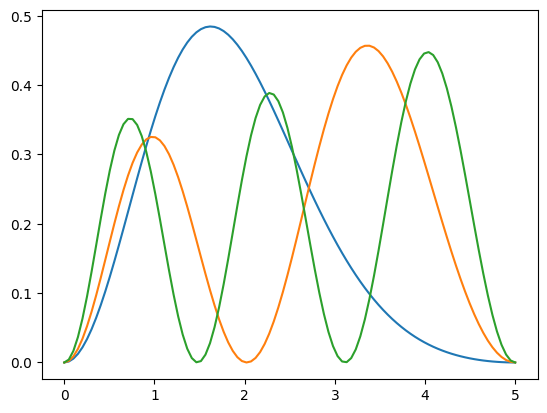

In [ ]:
plotfunc(0,5,100,lambda x: (WaveFunction(Hamiltoniana(lambda x: 2*x,5,100,100),5,x)[0:3].T)**2)

In [ ]:
GaussianQuadrature(0,5,1000,lambda x: (WaveFunction(Hamiltoniana(lambda x: 2*x,5,100,100),5,x))**2)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Ex. 5.10

In [ ]:
def relaxation(f,errmin,x=1,retit = 0):
    n = 0
    while True:
        x, err = f(x), abs(f(x)-x)
        n += 1
        if (err < errmin).all():
            if retit:
                return x,n
            return x


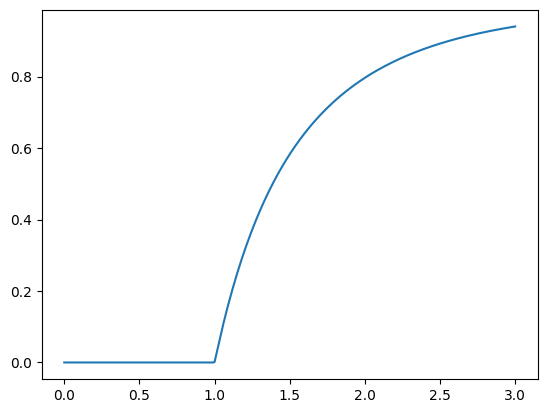

In [ ]:
plotfunc(0,3,301,lambda c : relaxation(lambda x: 1-np.exp(-c*x),1e-6))

### Ex. 5.11.1

Seja $x = \alpha + \epsilon$ e $x' = \alpha + \epsilon'$, com $f(\alpha) = \alpha$ 

\begin{equation*}
\begin{align*}
x' &= (1+\omega)f(x)-\omega x\\
\alpha + \epsilon' &= (1+\omega)f(\alpha + \epsilon) - \omega(\alpha + \epsilon)\\
\alpha + \epsilon' &= (1+\omega)\left(f(\alpha)+\epsilon f'(\alpha) + \frac{\epsilon^2}{2} f''(\alpha) + \cdots\right) - \omega(\alpha + \epsilon)\\
\alpha + \epsilon' &\simeq (1+\omega)(f(\alpha)+\epsilon f'(\alpha)) - \omega(\alpha + \epsilon)\\
\alpha + \epsilon' &\simeq ((1+\omega)f'(\alpha) - \omega) \epsilon + (1+\omega)\alpha - \omega\alpha\\
\epsilon' &\simeq ((1+\omega)f'(\alpha) - \omega) \epsilon\\

\end{align*}
\end{equation*}

\begin{equation*}
\begin{align*}
\therefore &
\left\{
 \begin{array}{ll} 
    \alpha = x - \epsilon \simeq x - \frac{\epsilon'}{(1+\omega)f'(\alpha) - \omega}\\
    \alpha = x' - \epsilon'
 \end{array}
 \right.\\
 \Leftrightarrow &~ 0 \simeq x - x' - \frac{\epsilon'}{(1+\omega)f'(\alpha) - \omega} + \epsilon'\\
 \Leftrightarrow & \left( \frac{1}{(1+\omega)f'(\alpha) - \omega} - 1\right)\epsilon' \simeq x - x'\\
 \Leftrightarrow &~ \epsilon' \simeq \frac{x-x'}{1/([1+\omega]f'(\alpha)-\omega)-1} \simeq \frac{x-x'}{1-1/([1+\omega]f'(x)-\omega)}
\end{align*}
\end{equation*}

### Ex. 5.11.2

In [ ]:
def super_relaxation(f,errmin,x=1,omega = 1,retit = 0):
    if omega == -1:
        if retit:
            return x,np.inf
        return x
    n = 0
    while True:
        x, err = (1+omega)*f(x)-omega*x, abs(f(x)-x)
        n += 1
        if (err < errmin).all():
            if retit:
                return x,n
            return x

In [ ]:
relaxation(lambda x: 1-np.exp(-2*x),1e-6,retit=1)

(0.7968126311118457, 14)

In [ ]:
super_relaxation(lambda x: 1-np.exp(-2*x),1e-6,retit=1)

(0.7968120570818893, 9)

### Ex. 5.11.3

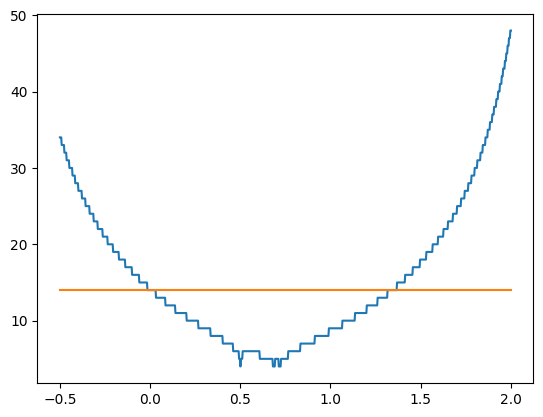

In [ ]:
omegamin = -0.5
omegamax = 2
N = 1000
x = 1

t = np.linspace(omegamin,omegamax,N)
y = np.empty(N)
for i in range(N):
    y[i] = super_relaxation(lambda x: 1-np.exp(-2*x),1e-6,omega = t[i],retit=1)[-1]
plt.plot(t,y)
plt.plot(np.array((omegamin,omegamax)),relaxation(lambda x: 1-np.exp(-2*x),1e-6,retit=1)[-1]*np.ones(2))
plt.show()

In [ ]:
super_relaxation(lambda x: 1-np.exp(-2*x),1e-6,omega = 0.5,retit=1)

(0.7968121566399141, 5)

### Ex. 5.12.1

\begin{equation*}
\left\{
 \begin{array}{ll} 
    -b + a \frac{b}{a+b^2} + b ^ 2 \frac{b}{a+b^2} = -b + \frac{a b + b ^ 3}{a+b^2} = -b + b = 0\\
    b - a \frac{b}{a+b^2} - b ^ 2 \frac{b}{a+b^2} = b - \frac{a b + b ^ 3}{a+b^2} = b - b = 0
 \end{array}
\right.\\
\end{equation*}

### Ex. 5.12.2

\begin{equation*}
\begin{align*}

\left\{
 \begin{array}{ll} 
   -x + a y  + x ^ 2 y = 0\\
   b - a y - x ^ 2 y = 0
 \end{array}
\right.
\Leftrightarrow &
\left\{
 \begin{array}{ll} 
   x = (a + x ^ 2) y\\
   b = (a + x ^ 2) y
 \end{array}
\right.\\
\Leftrightarrow & 
\left\{
 \begin{array}{ll} 
   x = (a + x ^ 2) y\\
   y = \frac{b}{a+x^2}
 \end{array}
\right.\\
\end{align*}
\end{equation*}

In [ ]:
def ndrelaxation(F,errmin,X,stop = 1e3):
    n = 0
    while True:
        X, err = F(X), np.sqrt(np.sum((F(X)-X)**2,axis=0))
        n += 1
        if n == stop: return np.nan
        if (err < errmin).all():
            return X

In [ ]:
ndrelaxation(lambda X : np.array(((1+X[0]**2)*X[1],2/(1+X[0]**2))),1e-6,np.array((1,1)))

nan

### Ex. 5.12.3

\begin{equation*}
\begin{align*}

\left\{
 \begin{array}{ll} 
   -x + a y  + x ^ 2 y = 0\\
   b - a y - x ^ 2 y = 0
 \end{array}
\right.
\Leftrightarrow &
\left\{
 \begin{array}{ll} 
   x = (a + x ^ 2) y\\
   b - a y =  x ^ 2 y
 \end{array}
\right.\\
\Leftrightarrow & 
\left\{
 \begin{array}{ll} 
   y = \frac{x}{a + x ^ 2} \\
   x = \sqrt{\frac{b}{y}-a}
 \end{array}
\right.\\
\end{align*}
\end{equation*}

In [ ]:
ndrelaxation(lambda X : np.array((np.sqrt(2/X[1]-1),X[0]/(1+X[0]**2))),1e-6,np.array((1,1)))

array([1.99999801, 0.40000024])

### Ex. 5.13

In [ ]:
b = 6.62607e-34*2.99792e8/(1.38065e-23*ndrelaxation(lambda x : 5-5*np.exp(-x),1e-6,1))
print(b)

0.002897765369612371


In [ ]:
b/502e-9

5772.440975323449

### Ex. 5.14

C:\Users\jose2\AppData\Local\Temp\ipykernel_5788\3964907150.py:6: RuntimeWarning: divide by zero encountered in divide
  y2 = lambda E : np.sqrt((20-E)/E)
C:\Users\jose2\AppData\Local\Temp\ipykernel_5788\3964907150.py:7: RuntimeWarning: divide by zero encountered in divide
  y3 = lambda E : -np.sqrt(E/(20-E))
C:\Users\jose2\AppData\Local\Temp\ipykernel_5788\3964907150.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


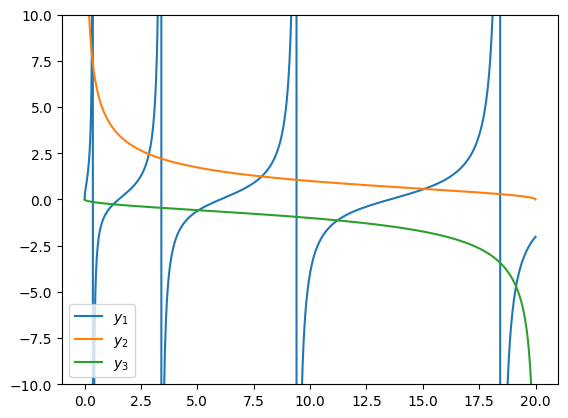

In [ ]:
hbar = 6.582119514e-16
Me = 9.1094e-31
qe = 1.6022e-1

y1 = lambda E : np.tan(np.sqrt(Me*E/(2*hbar**2*qe)))
y2 = lambda E : np.sqrt((20-E)/E)
y3 = lambda E : -np.sqrt(E/(20-E))
t = np.linspace(0,20,1000)

fig, ax = plt.subplots()
ax.plot(t, y1(t),label="$y_{1}$")
ax.plot(t, y2(t),label="$y_{2}$")
ax.plot(t, y3(t),label="$y_{3}$")
ax.set_ylim(-10,10)
ax.legend()
fig.show()

In [ ]:
def bissection(f,a,b,errmin):
    if f(a) > f(b):
        a, b = b, a
    while True:
        h = (a+b)/2
        if f(h) == 0: return h
        elif f(h) < 0:
            a = h
        else:
            b = (a+b)/2
        if abs(f(h)) < errmin:
            return h

In [ ]:
print("y0 = ",bissection(lambda E: y1(E)-y2(E),0.1,0.35,1e-6))
print("y1 = ",bissection(lambda E: y1(E)-y3(E),0.5,2.5,1e-6))
print("y2 = ",bissection(lambda E: y1(E)-y2(E),2,3,1e-6))
print("y3 = ",bissection(lambda E: y1(E)-y3(E),4,6,1e-6))
print("y4 = ",bissection(lambda E: y1(E)-y2(E),7.5,9,1e-6))
print("y5 = ",bissection(lambda E: y1(E)-y3(E),10,12,1e-6))


y0 =  0.31794280409812925
y1 =  1.2700920104980469
y2 =  2.851059675216675
y3 =  5.05047607421875
y4 =  7.849937438964844
y5 =  11.21522331237793


### Ex. 5.15

In [ ]:
P6 = lambda x : 924 * x ** 6 - 2772 * x ** 5 + 3150 * x ** 4 - 1680 * x ** 3 + 420 * x **2 - 42 * x + 1
def NewtonMethod(f,x,errmin):
    while True:
        df = (f(x+errmin)-f(x-errmin))/(2*errmin)
        k = x
        x = x - f(x)/df
        if abs(x-k) < errmin:
            return x

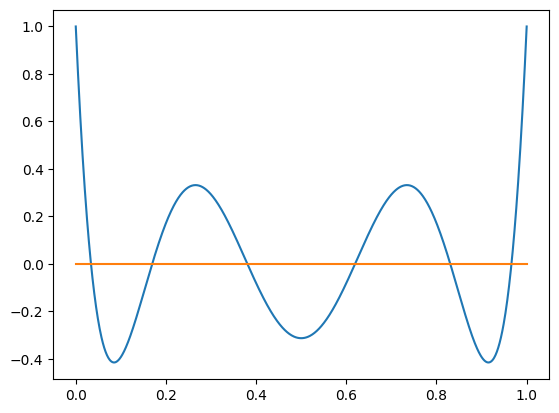

In [ ]:
t = np.linspace(0,1,1000)
plt.plot(t,P6(t))
plt.plot([0,1],[0,0])

In [ ]:
print("x1 = ",NewtonMethod(P6,0,1e-10))
print("x2 = ",NewtonMethod(P6,0.2,1e-10))
print("x3 = ",NewtonMethod(P6,0.3,1e-10))
print("x4 = ",NewtonMethod(P6,0.6,1e-10))
print("x5 = ",NewtonMethod(P6,0.8,1e-10))
print("x6 = ",NewtonMethod(P6,0.9,1e-10))

x1 =  0.03376524289842398
x2 =  0.16939530676686768
x3 =  0.3806904069584026
x4 =  0.6193095930415812
x5 =  0.8306046932331012
x6 =  0.9662347571015598


### Ex. 5.16.1

\begin{equation*}
\begin{align*}
F_G^T - F_G^L &= m_s a_c\\
\frac{G M m_s}{r^2}-\frac{G m m_s}{(R-r)^2} &= m_s \omega^2 r\\
\frac{G M}{r^2}-\frac{G m}{(R-r)^2} &= \omega^2 r

\end{align*}
\end{equation*}

### Ex. 5.16.2

326045071.66535544

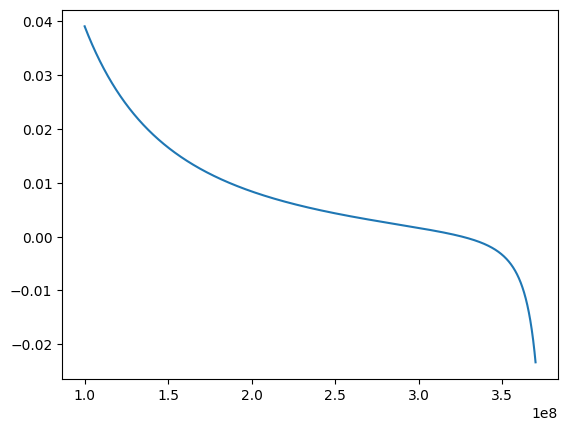

In [ ]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6
t = np.linspace(1e8,3.7e8,10000)
plt.plot(t,G*M/(t**2)-G*m/((R-t)**2)-omega**2*t)

NewtonMethod(lambda r: G*M/r**2-G*m/(R-r)**2-omega**2*r,3e8,1e-5)

In [ ]:
def SecantMethod(f,xn,xn1,errmin):
    while True:
        xn1, xn = xn1 - f(xn1) * (xn1-xn)/(f(xn1)-f(xn)), xn1
        if abs(xn1-xn) < errmin:
            return xn1

In [ ]:
SecantMethod(lambda r: G*M/r**2-G*m/(R-r)**2-omega**2*r,2e8,3e8,1e-5)

326045071.66535544

### Ex. 5.17.1

\begin{equation*}
\begin{align*}
\frac{V_2-V_+}{R_3}+\frac{V_2-0}{R_4} = I_0\left[e^{(V_1-V_2)/V_T}-1\right] \\
\frac{V_2-V_+}{R_3}+\frac{V_2}{R_4} = I_0\left[e^{(V_1-V_2)/V_T}-1\right] \\
\left(\frac{1}{R_3}+\frac{1}{R_4}\right)V_2 = I_0\left[e^{(V_1-V_2)/V_T}-1\right] + \frac{V_+}{R_3}\\
V_2 = \frac{R_3 R_4}{R_3 + R_4} \left(I_0\left[e^{(V_1-V_2)/V_T}-1\right] + \frac{V_+}{R_3} \right)\\
\end{align*}
\end{equation*}

### Ex. 5.17.2

\begin{equation*}
\begin{align*}

&\left\{
 \begin{array}{ll} 
   \frac{V_1-V_+}{R_1}+\frac{V_1}{R_2} + I_0\left[e^{(V_1-V_2)/V_T}-1\right] = 0\\\\
   \frac{V_2-V_+}{R_3}+\frac{V_2}{R_4} = I_0\left[e^{(V_1-V_2)/V_T}-1\right] \\
 \end{array}
\right.\\

&\left\{
 \begin{array}{ll} 
   \left(\frac{1}{R_1}+\frac{1}{R_2}\right)V_1 = -I_0\left[e^{(V_1-V_2)/V_T}-1\right] + \frac{V_+}{R_1}\\\\ 
   1+\frac{1}{I_0}\left(\frac{V_2-V_+}{R_3}+\frac{V_2}{R_4}\right)=e^{(V_1-V_2)/V_T}
 \end{array}
\right.\\

&\left\{
  \begin{array}{ll}
  \left(\frac{1}{R_1}+\frac{1}{R_2}\right)V_1 + \left(\frac{1}{R_3}+\frac{1}{R_4}\right)V_2 = \left(\frac{1}{R_1} + \frac{1}{R_3}\right) V_+\\\\
  V_2 = V_1 - V_T \log\left[1+\frac{1}{I_0}\left(\left[\frac{1}{R_3}+\frac{1}{R_4}\right]V_2-\frac{V_+}{R_3}\right)\right]
  \end{array}
\right.\\


\end{align*}
\end{equation*}

In [ ]:
Vp = 5
R1 = 1e3
R2 = 4e3
R3 = 3e3
R4 = 2e3
I0 = 3e-9
Vt = 5e-2

print(ndrelaxation(lambda X : np.array((X[1]+Vt*np.log(1-1/I0*((1/R2+1/R1)*X[0]-Vp/R1)),X[0]-Vt*np.log(1+1/I0*((1/R3+1/R4)*X[1]-Vp/R3)))), 1e-2, np.array((3.44,2.82))))

print(ndrelaxation(lambda X : np.array((-((1/R3 + 1/R4)*X[1]-(1/R1 + 1/R3)*Vp)/(1/R1 + 1/R2),
                                        X[0]-Vt*np.log(1+1/I0*((1/R3+1/R4)*X[1]-Vp/R3)))), 
                                        1e-6, np.array((3.8,2.7))))



[3.43801138 2.82319349]
[3.44695492 2.82956748]


In [ ]:
def Jacobian(F,X,m):
    """Determina a Matriz Jacobiana da função F(x1,...,xm) = (F1,...,Fn)(x1,...,xm)"""
    E = np.identity(m)*1e-4
    return (F(X+E)-F(X-E))/2e-4

In [ ]:
def ndNewtonMethod(F,X,errmin, m = 0):
    if m == 0: m = X.size
    J = Jacobian(F,X,m)
    while True:
        X, k = X - np.linalg.solve(J,F(X)), X
        if (abs(X-k)<errmin).all():
            return X




In [ ]:
ndNewtonMethod(lambda X : np.array((-((1/R3 + 1/R4)*X[1]-(1/R1 + 1/R3)*Vp)/(1/R1 + 1/R2)-X[0],X[0]-Vt*np.log(1+1/I0*((1/R3+1/R4)*X[1]-Vp/R3))-X[1])),np.array((3,2.4),float),1e-6)

array([3.44695463, 2.82956806])

### Ex. 5.18

In [ ]:
def eta(T):
    h = 6.62607015e-34
    c = 299792458.0
    kb = 1.380649e-23
    return 15/np.pi**4 * GaussianQuadrature(h*c/(kb*700e-9*T),h*c/(kb*390e-9*T),100,lambda x: x**3/(np.exp(x)-1))

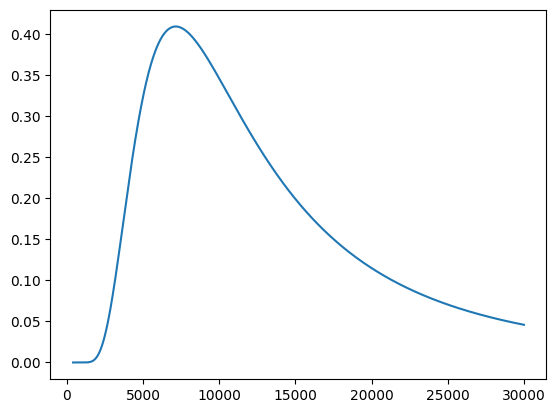

In [ ]:
t = np.linspace(400,30000,1000)
plt.plot(t,eta(t))
plt.show()

In [ ]:
def GoldenSection(f,x1,x4,errmin):
    delta = (3-np.sqrt(5))/2
    x2, x3 = x1+delta*(x4-x1),x4-delta*(x4-x1)
    while x4-x1>errmin:
        if f(x2) > f(x3):
            x4 = x3
            x3 = x2
            x2 = x1+delta*(x4-x1)
        else:
            x1 = x2
            x2 = x3
            x3 = x4-delta*(x4-x1)
    return 0.5*(x1+x4)

In [ ]:
GoldenSection(lambda T: eta(T),5000,10000,1e-4)

7141.988710391286

In [ ]:
eta(GoldenSection(lambda T: eta(T),5000,10000,1e-4))

array([0.40906712])

# Folha 6

### Ex. 6.1

In [ ]:
def FourierTransform(f,a,b,N,k):
    L = b-a
    g = np.arange(-k,k+1)
    
    g = GaussianQuadrature(a,b,N,lambda x : f(x) * np.exp(-2*np.pi*np.outer(g,x)*1j/L)) / L

    return g

def FourierSeries(f,x,a,b,N,k):
    return np.inner(FourierTransform(f,a,b,N,k),np.exp(2*np.pi*np.outer(x,np.arange(-k,k+1)*1j/(b-a))))


### Ex. 6.1.1

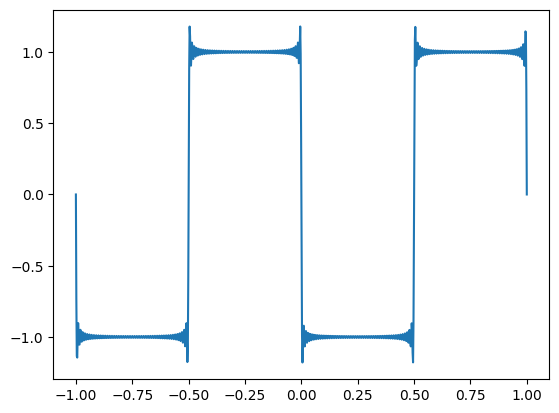

In [ ]:
def Quadrada(x):
    if x>=0 and x<=0.5:
        return -1
    if x>0.5 and x<=1:
        return 1    

DadosQuadrada = FourierTransform(lambda x : np.vectorize(Quadrada)(x),0,1,1000,100)
plotfunc(-1,1,1000,lambda y : FourierSeries(lambda x : np.vectorize(Quadrada)(x),y,0,1,1000,100))

### Ex. 6.1.2

In [ ]:
DadosSerra = FourierTransform(lambda x: x, -1, 1, 1000, 100)

Serra = lambda y : np.inner(DadosSerra,np.exp(2*np.pi*np.outer(y,np.arange(-100,101))*1j/2))

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


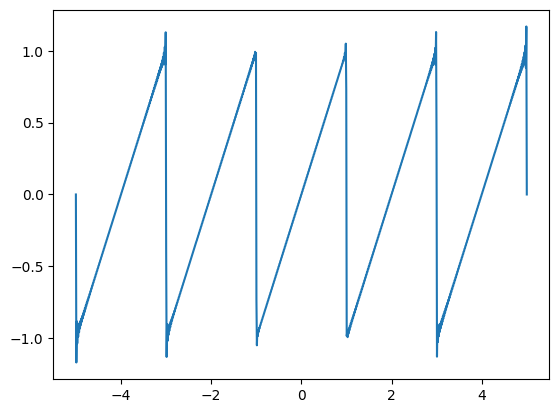

In [ ]:
plotfunc(-5,5,1000,lambda y : FourierSeries(lambda x: x,y, -1, 1, 1000, 100))

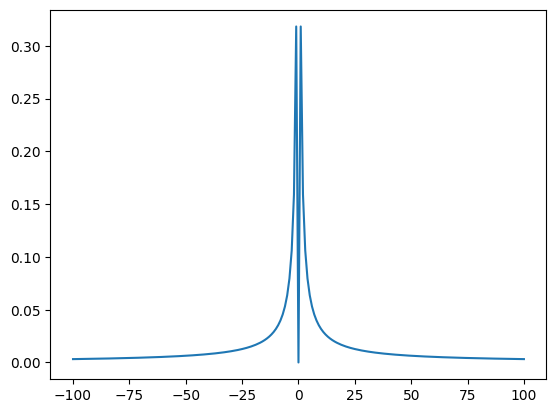

In [ ]:
plt.plot(np.arange(-100,101),np.abs(DadosSerra))
plt.show()

### Ex. 6.1.3

In [ ]:
DadosSinusoidal = FourierTransform(lambda n: np.sin(np.pi*n/1000)*np.sin(20*np.pi*n/1000),-1000,1000,1000,100)

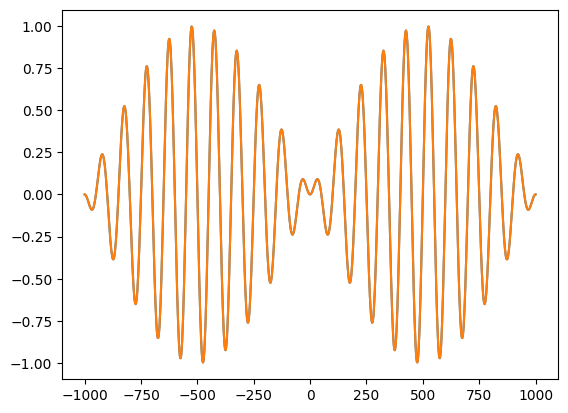

In [ ]:
plotfunc(-1000,1000,1000, lambda y : FourierSeries(lambda n: np.sin(np.pi*n/1000)*np.sin(20*np.pi*n/1000),y,-1000,1000,1000,100))
plotfunc(-1000,1000,1000,lambda n: np.sin(np.pi*n/1000)*np.sin(20*np.pi*n/1000))

### Ex. 6.2


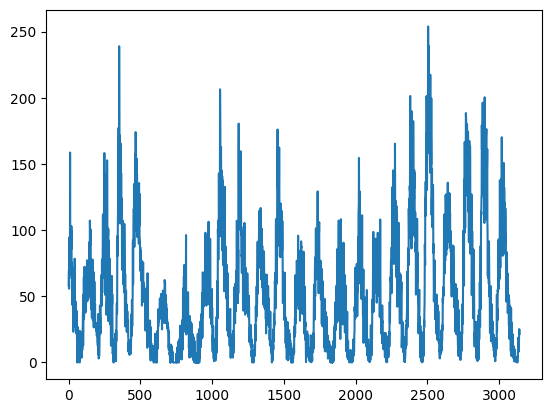

In [ ]:
s = np.loadtxt(".\\newman\\dados\\sunspots.txt")
plt.plot(s[:,0],s[:,1])
#T_Est = 3000/24 = 125

In [ ]:
def FourierTransformArray(v,k):
    L = v.size
    g = np.arange(-k,k+1)
    t = np.arange(0,L)
    f = lambda n : v[n]*np.exp(-2*np.pi*np.outer(g,n)*1j/L)
    g = np.sum(f(t[:-1:2])+f(t[2::2])+4*f(t[1::2]),axis=1)/(6*L)
    return g
    

In [ ]:
SunspotDados = FourierTransformArray(s[:,1],100)
Sunspot= lambda y : np.inner(SunspotDados,np.exp(2*np.pi*np.outer(y,np.arange(-100,101))*1j/(3142)))

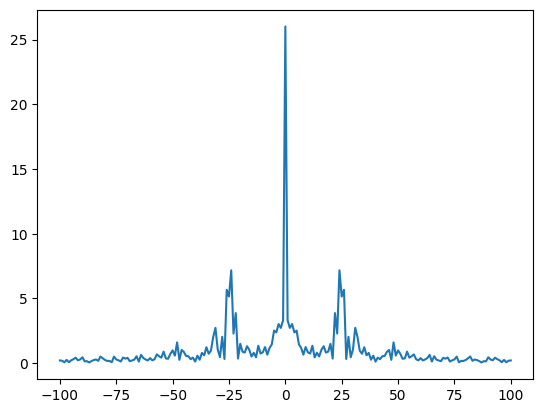

In [ ]:
plt.plot(np.arange(-100,101),np.abs(SunspotDados))


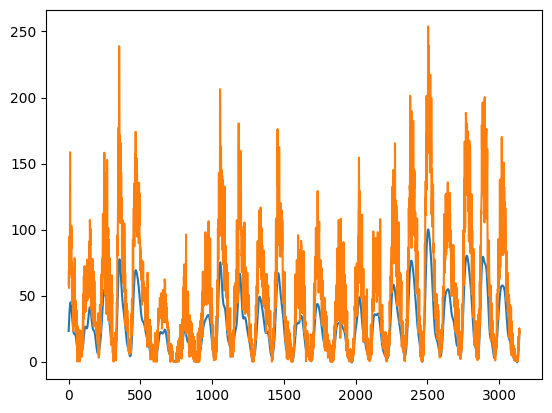

In [ ]:
plotfunc(0,3142,3142,Sunspot)
plt.plot(s[:,0],s[:,1])


In [ ]:
3142/25

125.68

### Ex. 6.3

In [ ]:
p = np.loadtxt("./newman/dados/piano.txt")
t = np.loadtxt("./newman/dados/trumpet.txt")


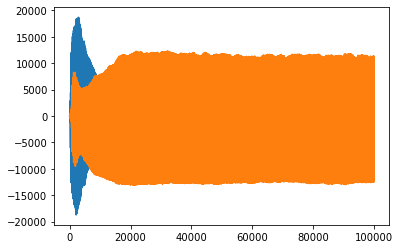

In [ ]:
plt.plot(p)
plt.plot(t)

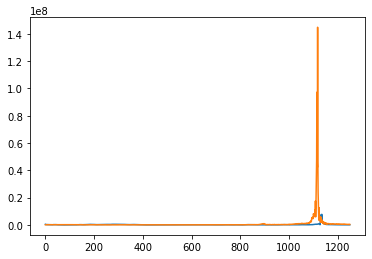

In [ ]:
plt.plot(abs(np.fft.rfft(p))[1250:2500])
plt.plot(abs(np.fft.rfft(t))[1250:2500])

In [ ]:
print(np.argmax(abs(np.fft.rfft(p))[1250:2500]),
np.argmax(abs(np.fft.rfft(t))[1250:2500]))
df = 2*np.pi/(1/2*(np.argmax(abs(np.fft.rfft(p))[:1250])+np.argmax(abs(np.fft.rfft(t))[:1250])))
dt = 1/df
T = dt/44100
f = 1/T
print(f)

1134 1117
233.53432115180766


### Ex 6.4

In [ ]:
d = np.loadtxt("./newman/dados/dow.txt")

def suavizar(f,r):
    k = np.fft.rfft(f)
    print(k.size)
    k[int(k.size*r)+1:] *= 0 
    nk = np.fft.irfft(k)
    return nk

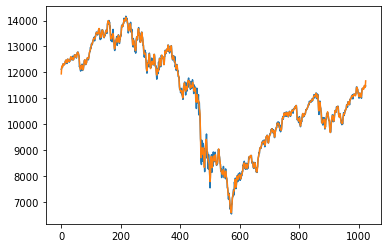

In [ ]:
plt.plot(d)
plt.plot(suavizar(d,0.2))

### Ex 6.5

In [ ]:
def OndaQuadrada(x,f):
    return -1 if (np.floor(2*x/f)%2) else 1

In [ ]:
OndaQuadrada = np.vectorize(OndaQuadrada)

501


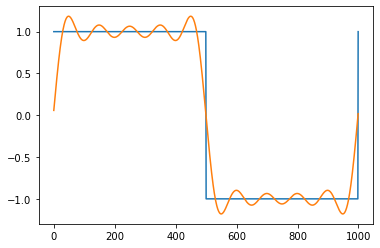

In [ ]:
t = np.linspace(0,1,1000)
plt.plot(OndaQuadrada(t,1))
plt.plot(suavizar(OndaQuadrada(t,1),0.018))

# Folha 7

### Ex. 7.1

In [234]:
def RungeKutta4(f,t0,x0,tf,h):
    T = np.arange(t0,tf,h)
    X = np.zeros((T.size,np.array(x0).size))
    X[0,:] = x0
    for i in range(len(T)-1):
        k1 = f(X[i]+h,T[i+1])
        k2 = f(X[i]+h*k1/2,T[i]+h/2)
        k3 = f(X[i]+h*k2/2,T[i]+h/2)
        k4 = f(X[i]+h*k3,T[i+1])
        X[i+1] = X[i] + (k1+2*k2+2*k3+k4)*h/6
    return T,X


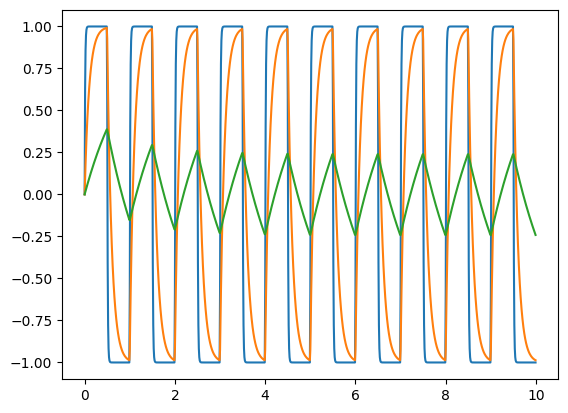

In [ ]:
tau = 1/np.array((0.01,0.1,1))

T, X = RungeKutta4(lambda x,t : (OndaQuadrada(t,1)-x)*tau[0],0,0,10,.01)
plt.plot(T,X)
T, X = RungeKutta4(lambda x,t : (OndaQuadrada(t,1)-x)*tau[1],0,0,10,.01)
plt.plot(T,X)
T, X = RungeKutta4(lambda x,t : (OndaQuadrada(t,1)-x)*tau[2],0,0,10,.01)
plt.plot(T,X)
plt.show()

### Ex. 7.2

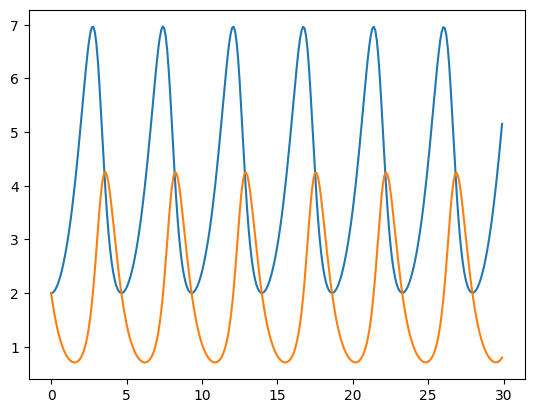

In [ ]:
def CoelhoRaposa(X,a=1,b=0.5,g=0.5,d=2):
    return np.array((a*X[0]-b*X[0]*X[1],g*X[0]*X[1]-d*X[1]))
T,X =RungeKutta4(lambda X,t : CoelhoRaposa(X),0,np.array((2,2)),30,0.1)
plt.plot(T,X)

### Ex. 7.3

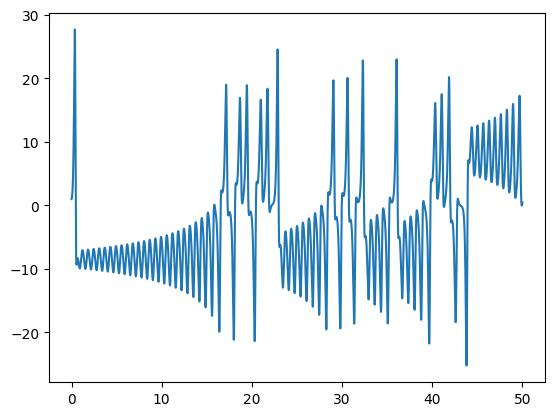

In [ ]:
def LorentzEq(X,sigma,r,b):
    return np.array((sigma*(X[1]-X[0]),
                     r*X[0]-X[1]-X[0]*X[2],
                     X[0]*X[1]-b*X[2]))

T,X = RungeKutta4(lambda X, t : LorentzEq(X,10,28,8/3),0,np.array((0,1,0)),50,0.001)

plt.plot(T,X[:,1])

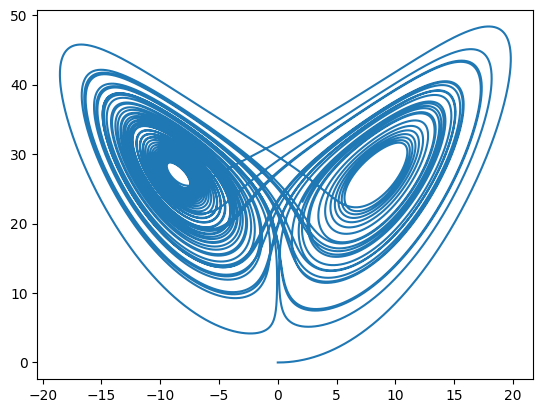

In [ ]:
plt.plot(X[:,0],X[:,2])

### Ex. 7.4

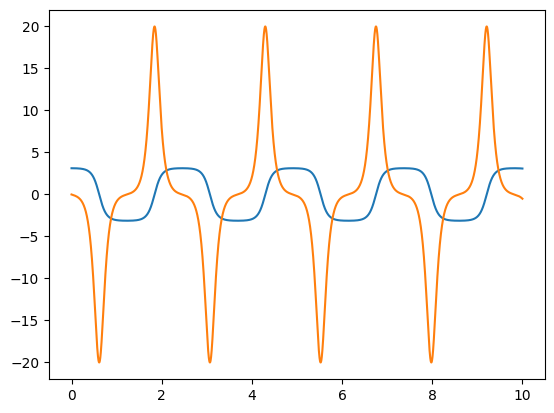

In [ ]:
def PenduloOrdem1(X,g,l):
    return np.array((X[1],-g/l*np.sin(X[0])))

T,X = RungeKutta4(lambda X, t : PenduloOrdem1(X,10,0.1),0,np.array((179*np.pi/180,0)),10,0.001)
plt.plot(T,X[:,0])
plt.plot(T,X[:,1])



MovieWriter ffmpeg unavailable; using Pillow instead.


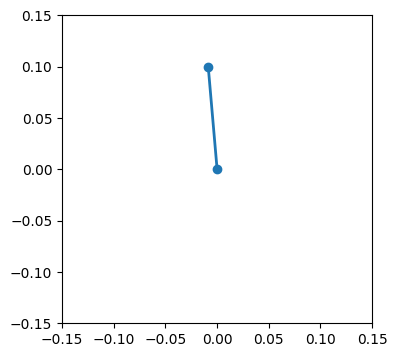

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

#line = ax.plot(np.zeros(2),np.zeros(2),"o-",lw=2)
l = 0.1


def func(frame,X,l):
    ax.cla()
    ax.set_xlim(-0.15,0.15)
    ax.set_ylim(-0.15,0.15)
    ax.plot(np.array((0,l*np.sin(X[frame,0]))),np.array((0,-l*np.cos(X[frame,0]))),"o-",lw=2)
    return fig,
ani = animation.FuncAnimation(fig,func,fargs=(X,l),frames=1000,interval=1)
ani.save(".\\teste.gif")
plt.show()

### Ex. 7.5

In [ ]:
def PenduloForcado(X,t,g,l,C,Omega):
    return np.array((X[1],-g/l*np.sin(X[0])+C*np.cos(X[0])*np.sin(Omega*t)))

T,X = RungeKutta4(lambda X,t : PenduloForcado(X,t,10,0.1,2,5), 0, np.array((0,0)),100,0.01)


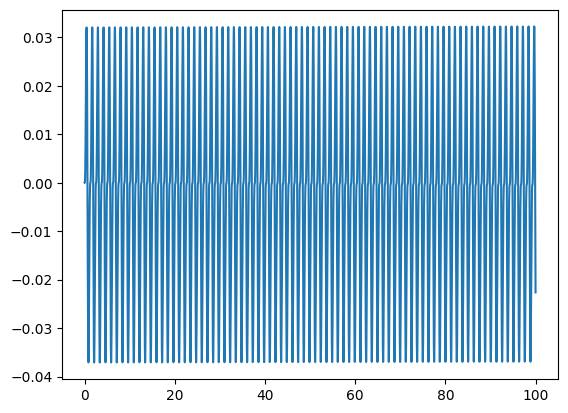

In [ ]:
plt.plot(T,X[:,0])

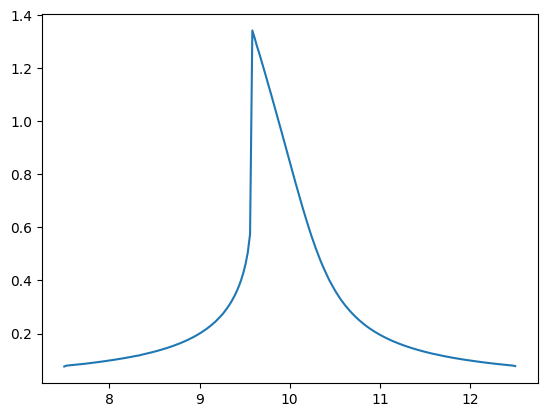

In [ ]:
Omega = np.linspace(7.5,12.5,200)
XM = np.zeros_like(Omega)
for i in range(200):
    T,X = RungeKutta4(lambda X,t : PenduloForcado(X,t,10,0.1,2,Omega[i]), 0, np.array((0,0)),100,0.01)
    XM[i] = np.max(X[:,0])
plt.plot(Omega,XM)
OmegaR=Omega[np.argmax(XM)]

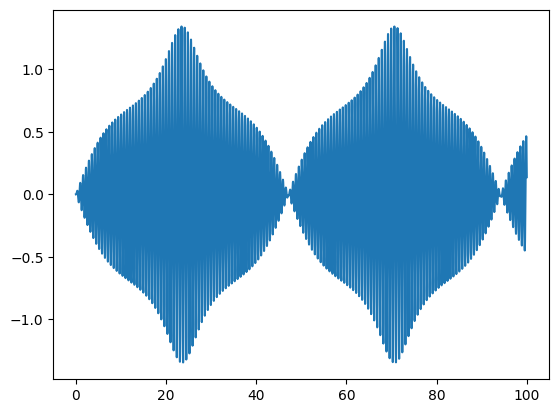

In [ ]:
T,X = RungeKutta4(lambda X,t : PenduloForcado(X,t,10,0.1,2,OmegaR), 0, np.array((0,0)),100,0.01)
plt.plot(T,X[:,0])

### Ex. 7.6.1

\begin{equation*}
\frac{d^2 x}{d t^2} = -\omega^2 x
\end{equation*}
Seja $y = \frac{d x}{dt}$
Então tem-se que

\begin{equation*}
\begin{align*}

&\left\{
 \begin{array}{ll} 
   \frac{d x}{dt} = y \\
   \frac{d y}{dt} = - \omega^2 x\\
 \end{array}
\right.\\
\end{align*}
\end{equation*}

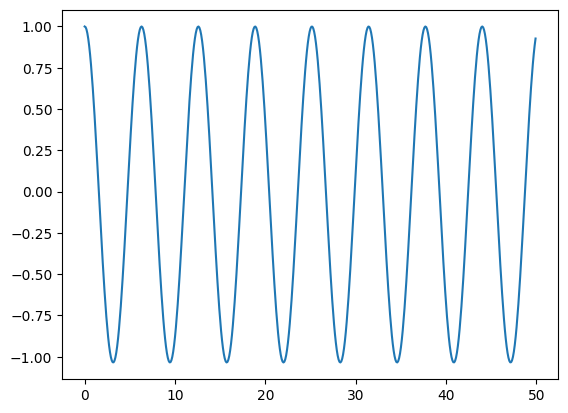

In [ ]:
def OsciladorHarmonicoED(X,omega):
    return np.array((X[1],-X[0]*omega**2))

T, X = RungeKutta4(lambda X,t : OsciladorHarmonicoED(X,1), 0, np.array((1,0)),50,0.1)
plt.plot(T,X[:,0])

### Ex. 7.6.2

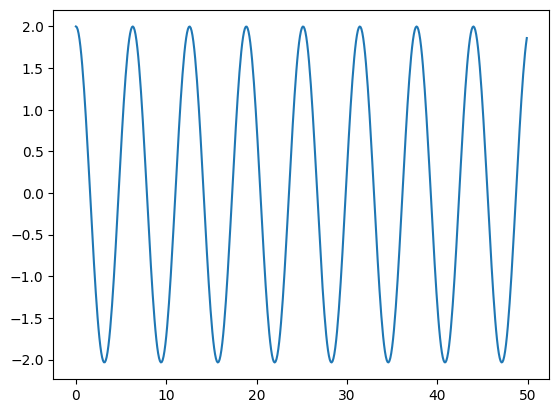

In [ ]:
T, X = RungeKutta4(lambda X,t : OsciladorHarmonicoED(X,1), 0, np.array((2,0)),50,0.1)
plt.plot(T,X[:,0])

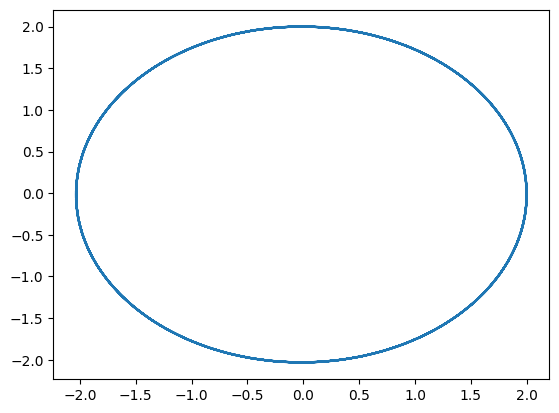

In [ ]:
plt.plot(X[:,0],X[:,1])

### Ex. 7.6.3

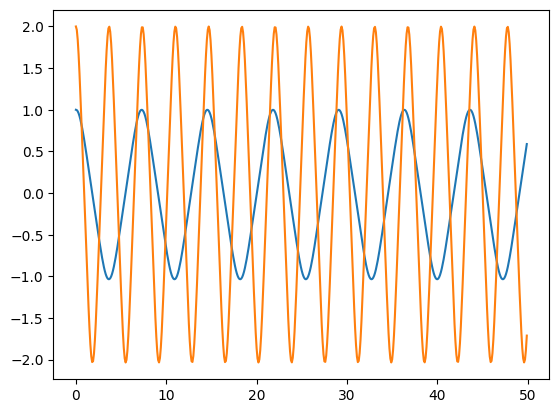

In [ ]:
def OsciladorAnarmonicoED(X,omega):
    return np.array((X[1],-omega**2*X[0]**3))

T, X = RungeKutta4(lambda X,t : OsciladorAnarmonicoED(X,1), 0, np.array((1,0)),50,0.1)
plt.plot(T,X[:,0])
T, X = RungeKutta4(lambda X,t : OsciladorAnarmonicoED(X,1), 0, np.array((2,0)),50,0.1)
plt.plot(T,X[:,0])

### Ex. 7.6.4

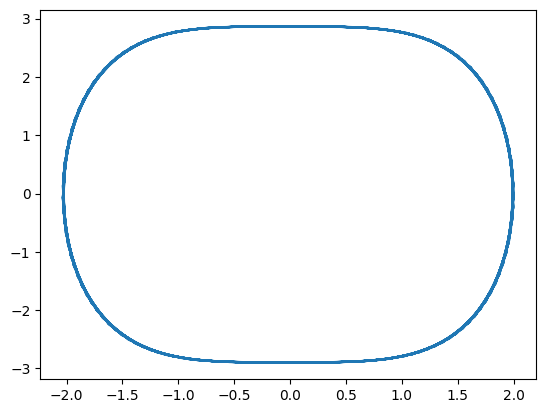

In [ ]:
plt.plot(X[:,0],X[:,1])

### Ex. 7.6.5

Equação diferencial:

$$\frac{d^2 x}{d t^2} - \mu (1-x^2)\frac{d x}{d t} + \omega^2 x=0$$

Se $ y = \frac{d x}{d t}$, então tem-se que:
\begin{equation*}
\begin{align*}
&\left\{
 \begin{array}{ll} 
   \frac{d x}{dt} = y \\
   \frac{d y}{dt} = \mu (1-x^2) y - \omega^2 x\\
 \end{array}
\right.\\
\end{align*}
\end{equation*}

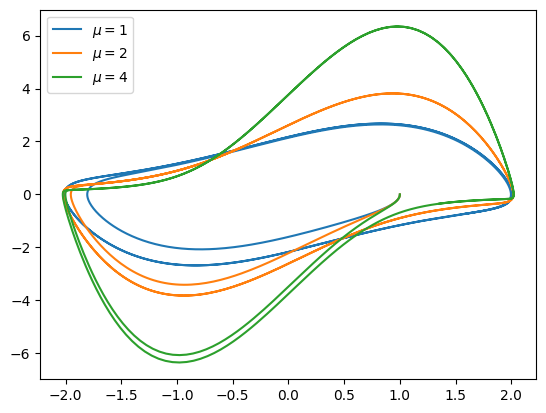

In [ ]:
def OsciladorVanderPolED(X,mu,omega):
    return np.array((X[1],mu*(1-X[0]**2)*X[1]-omega**2*X[0]))

T, X = RungeKutta4(lambda X,t : OsciladorVanderPolED(X,1,1), 0, np.array((1,0)),20,0.01)
plt.plot(X[:,0],X[:,1],label="$\mu=1$")
T, X = RungeKutta4(lambda X,t : OsciladorVanderPolED(X,2,1), 0, np.array((1,0)),20,0.01)
plt.plot(X[:,0],X[:,1],label="$\mu=2$")
T, X = RungeKutta4(lambda X,t : OsciladorVanderPolED(X,4,1), 0, np.array((1,0)),20,0.01)
plt.plot(X[:,0],X[:,1],label="$\mu=4$")
plt.legend()

# Folha 8

### Ex. 8.1

In [ ]:
def SecondDerivative(f,x,e,m=0,n=1):
    if m == 0: m = x.size
    E = np.identity(m)[n-1]*e
    print(x)
    return (f(x+E)+f(x-E)-2*f(x))/e**2

In [136]:
def LaplaceEquation(N,V0,errmin):
    phi = np.zeros((N+1,N+1))
    phi[0,:] = V0

    while True:
        phi0 = np.copy(phi)
        for i in range(1,N):
            for j in range(1,N):
                phi[i,j]=(phi0[i-1,j]+phi0[i+1,j]+phi0[i,j-1]+phi0[i,j+1])/4
        if (abs(phi-phi0)<errmin).all():
            return phi
        

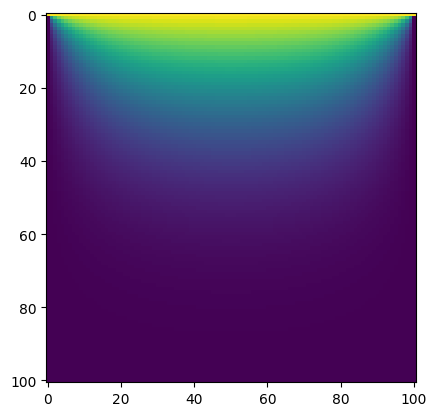

In [137]:
plt.imshow(LaplaceEquation(100,1,1e-4))

In [138]:
def LaplaceEquation2(N,rho,epsilon0,errmin):
    phi = np.zeros((N+1,N+1),np.float64)
    a = 1/N
    while True:
        phi0 = np.copy(phi)
        for i in range(1,N):
            for j in range(1,N):
                phi[i,j]=(phi0[i-1,j]+phi0[i+1,j]+phi0[i,j-1]+phi0[i,j+1])/4+a**2/(4*epsilon0)*rho(i*a,j*a)
        if (np.abs(phi-phi0)<errmin).all():
            return phi

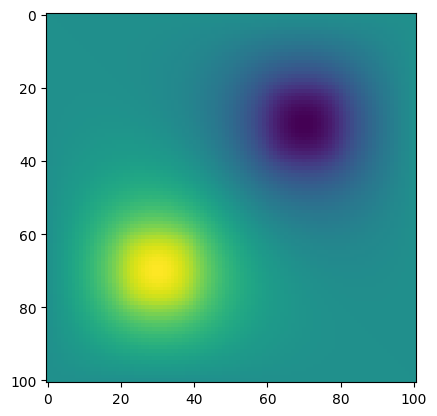

In [139]:
plt.imshow(LaplaceEquation2(100,lambda x,y : 1 if (.6<x<.8 and .2<y<.4) else -1 if (.6<y<.8 and .2<x<.4) else 0,1,1e-6))

### Ex. 8.2

In [143]:
def GaussSeidelLaplaceEq(N,V0,errmin,omega):
    phi = np.zeros((N+1,N+1))
    phi[0,:] = V0

    while True:
        phi0 = np.copy(phi)
        for i in range(1,N):
            for j in range(1,N):
                phi[i,j]=(1+omega)*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1])/4-omega*phi[i,j]
        if (abs(phi-phi0)<errmin).all():
            return phi

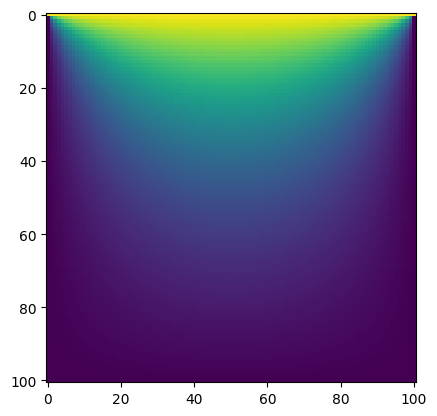

In [160]:
plt.imshow(GaussSeidelLaplaceEq(100,1,1e-6,omega=0.9225))

### Ex. 8.3

In [194]:
def Condensador(N,V0,errmin,omega):
    phi = np.zeros((N+1,N+1))
    a = 1/N
    phi[int(0.2/a):int(0.81/a),int(0.2/a)] += V0
    phi[int(0.2/a):int(0.81/a),int(0.8/a)] += -V0

    while True:
        phi0 = np.copy(phi)
        for i in range(1,N):
            for j in range(1,N):
                if (j==int(0.2/a) and int(0.2/a)<=i<=int(0.8/a)) or (j==int(0.8/a) and int(0.2/a)<=i<=int(0.8/a)):
                    continue
                else:
                    phi[i,j]=(1+omega)*(phi[i-1,j]+phi[i+1,j]+phi[i,j-1]+phi[i,j+1])/4-omega*phi[i,j]
        if (abs(phi-phi0)<errmin).all():
            return phi
    

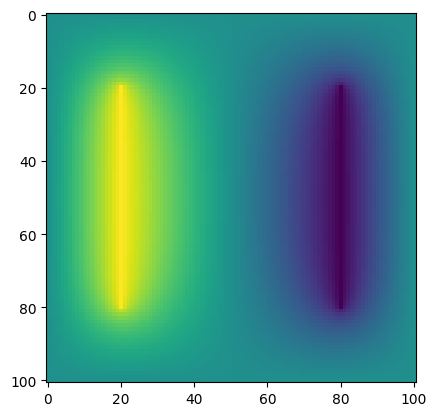

In [213]:
plt.imshow(Condensador(100,1,1e-6,0.81))

### Ex. 8.4

In [245]:
def EarthCrustThermalDiffusion(A,B,tau,D,N,tf,h):
    a = 20/N
    T0 = np.zeros((N+1))+10
    T0[0] = A
    T0[-1] = 11
    t, T = RungeKutta4(lambda T,t : np.array([B*2*np.pi*np.cos(2*np.pi*t/tau) if (i==0) else 0 if (i==N) else D/a**2*(T[i-1]+T[i+1]-2*T[i]) for i in range(N+1)]),0,T0,tf,h)
    return t,T


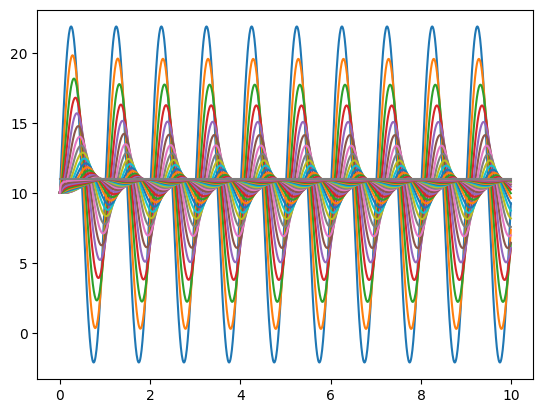

In [314]:
t, T = EarthCrustThermalDiffusion(10,12,1,0.1*365,27,10,0.01)
plt.plot(t,T)
plt.show()

In [317]:
def ThermalDiffusion(Th,Tc,Tmed,D,N,tf,h):
    a = 0.01/N
    T0 = np.zeros((N+1))+Tmed
    T0[0] = Th
    T0[-1] = Tc
    return RungeKutta4(lambda T,t : np.array([0 if (i==0 or i==N) else D/a**2*(T[i-1]+T[i+1]-2*T[i]) for i in range(N+1)]),0,T0,tf,h)

In [318]:
t, T = ThermalDiffusion(50,0,20,4.25e-6,100,10,1e-4)

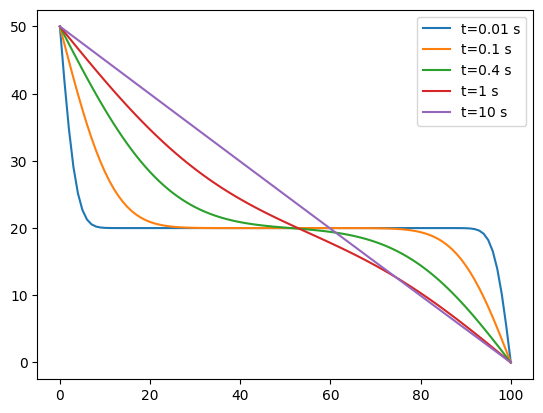

In [320]:
plt.plot(np.arange(0,101),T[100,:],label = ("t=0.01 s"))
plt.plot(np.arange(0,101),T[1000,:],label = ("t=0.1 s"))
plt.plot(np.arange(0,101),T[4000,:],label = ("t=0.4 s"))
plt.plot(np.arange(0,101),T[10000,:],label = ("t=1 s"))
plt.plot(np.arange(0,101),T[100000-1,:],label = ("t=10 s"))
plt.legend()

### Ex. 8.5

In [391]:
def CordasPiano(L,v,psi,N,t0,tf,h):
    T = np.arange(t0,tf,h) # instantes
    x,a = np.linspace(0,L,N+1,retstep=1) # posições
    Sol = np.zeros((T.size,2,N+1)) # soluções da equação
    Sol[0,1] = psi(x)
    for i in range(len(T)-1):
        Sol[i+1,0] = Sol[i,0]+h*Sol[i,1]
        Sol[i+1,1,1:-1] = Sol[i,1,1:-1] + h*v**2/a**2*(Sol[i,0,:-2]+Sol[i,0,2:]-2*Sol[i,0,1:-1])

    return T,x,Sol

def Perturbacao(x,C,L,d,sigma):
    return C*x*(L-x)/L**2*np.exp(-(x-d)**2/(2*sigma**2))

T,x, X = CordasPiano(1,100,lambda x: Perturbacao(x,1,1,0.1,0.3),100,0,1,1e-6)

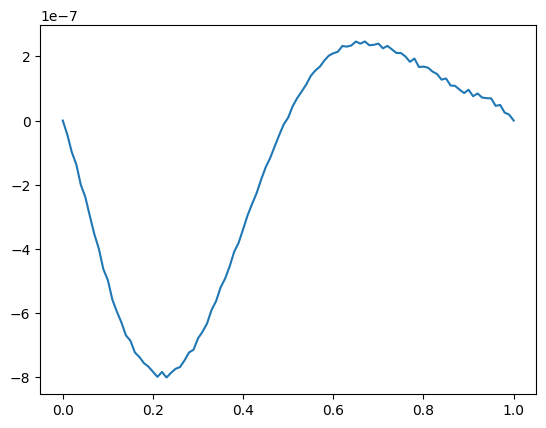

In [427]:
plt.plot(x,X[40000,0])

MovieWriter ffmpeg unavailable; using Pillow instead.


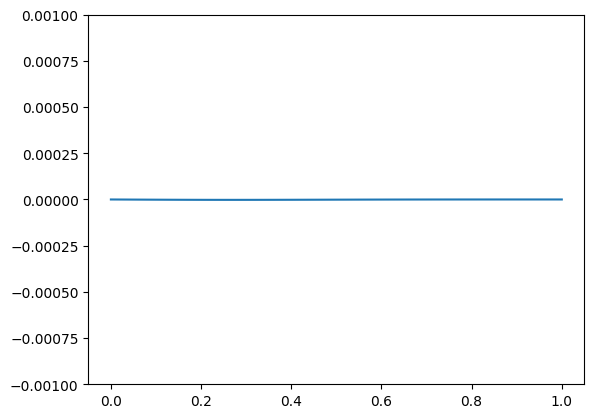

In [432]:
fig,ax = plt.subplots()

line = ax.plot(x,X[0,0])
ax.set_ylim(-1e-3,1e-3)

def func(frame):
    line[0].set_ydata(X[frame*10,0])
    return line
ani = animation.FuncAnimation(fig,func,2000,interval=1)
ani.save(".\\Piano.gif")
plt.show()
